### Pengaruh Adaptive Learning Rate dan Data Preprocessing Terhadap Perbandingan Hasil Akurasi Model Neural Network Pediksi Harga Berlian pada Model Multilayer Perceptron dan 1D Convolutional Neural Network


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, Normalizer, RobustScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error, r2_score

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Preproses Data

Tahapan Preproses Data Awal sebelum siap digunakan pada Training dan Testing Modl
- Upload Data
- Cek Null data dan data duplikat
- Cek Value data kategorikal
- Plot data awal melihat hubungan antar data dan persebaran data pada data numerikal
- Lakukan preproses data pada data numerikal jika ( Hilangkan Outliers )
- Lihat persebaran data kategorikal
- Standarisasi data dan encode data kategorikal
- Split data menjadi Train dan Test data

In [2]:
# Sumber dataset
# https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

# import data
data = pd.read_csv("Diamonds Prices2022.csv")
data.drop("Unnamed: 0", axis = 'columns', inplace = True)

In [3]:
data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
53940   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49
53941   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43
53942   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47

[53943 rows x 10 columns]

In [4]:
data.describe()

carat         depth         table         price             x  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean       0.797935     61.749322     57.457251   3932.734294      5.731158   
std        0.473999      1.432626      2.234549   3989.338447      1.121730   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53943.000000  53943.000000  
mean       5.734526      3.538730  
std        1.142103      0.705679  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# cek data duplikat
data.duplicated().sum()

149

In [7]:
# hapus semua duplikat, karena jumlah sedikit hapus saja
data.drop_duplicates(ignore_index= True, inplace = True)

In [8]:
data.duplicated().sum()

0

In [9]:
# cek data hilang
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
# cek nilai pada tiap data kategorikal
for nama_kolom in data.columns:
    if data[nama_kolom].dtype == "object":
        print(f"kolom : {nama_kolom} punya data unik \n{data[nama_kolom].unique()} \n")

kolom : cut punya data unik 
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] 

kolom : color punya data unik 
['E' 'I' 'J' 'H' 'F' 'G' 'D'] 

kolom : clarity punya data unik 
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'] 



In [11]:
# memisahkan nama kolom untuk data kategorikal dan non-kategorikal
kolom_num = []
kolom_str = []

for data_kolom in data.columns:
    if data[data_kolom].dtype == "object":
        kolom_str.append(data_kolom)
    else:
        kolom_num.append(data_kolom)

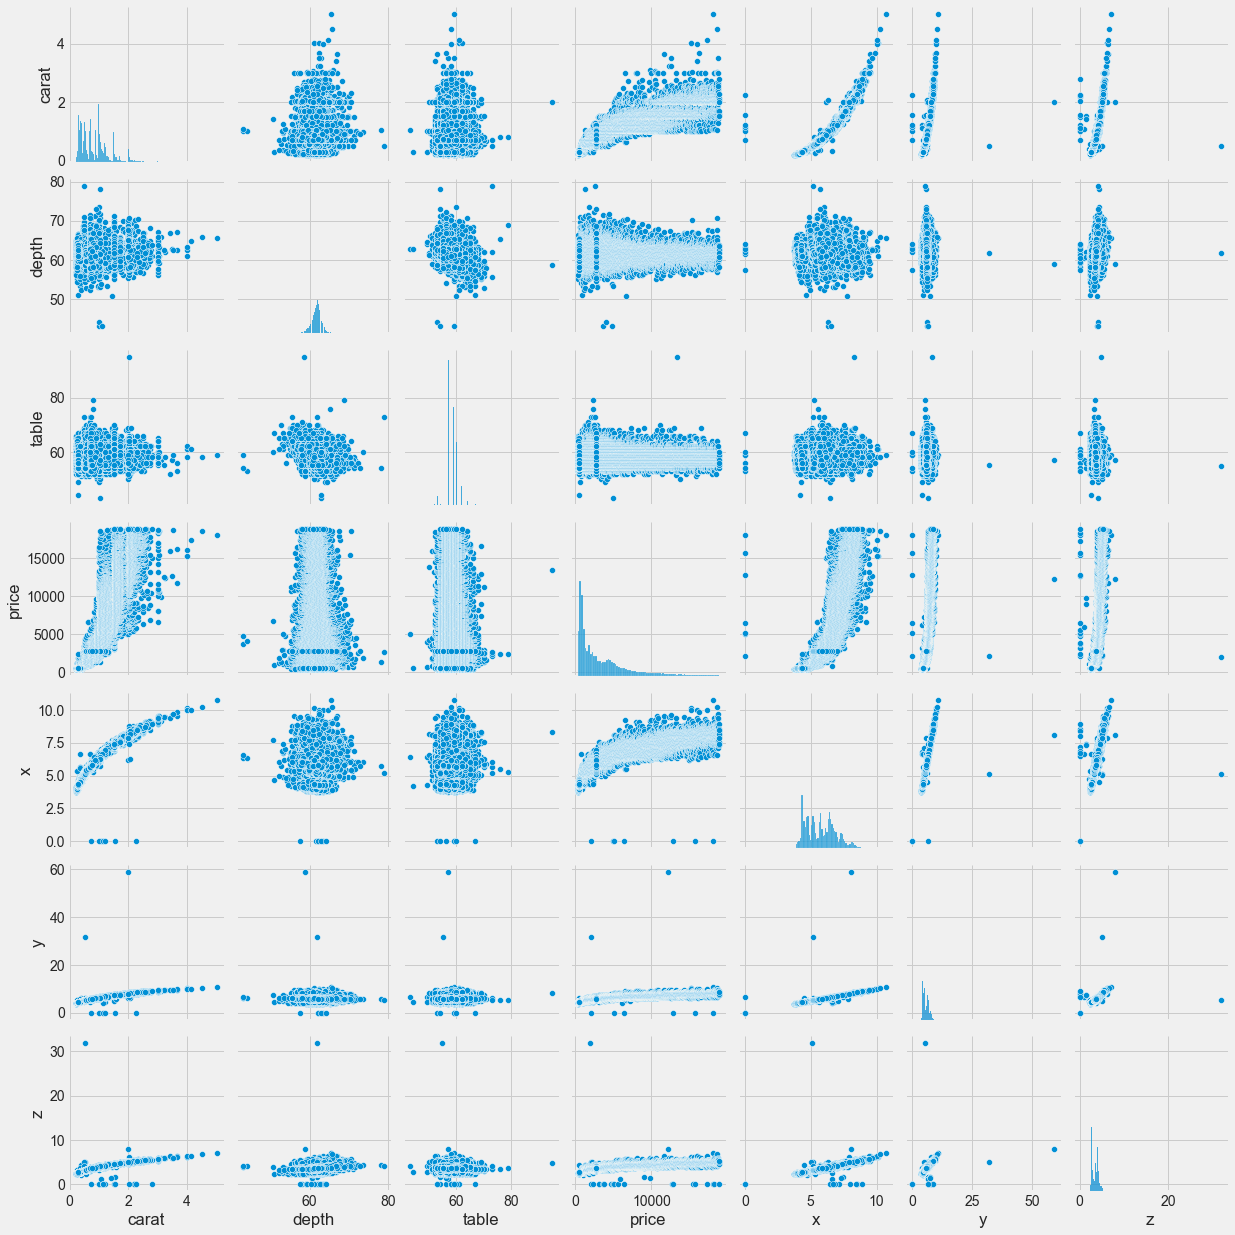

In [12]:
# lihat hubungan scatter plot pada tiap kolom dengan kolom lain
sns.pairplot(data)

In [13]:
# persebaran data numerikal
fig, axes = plt.subplots(nrows=7, ncols=1, figsize = (10,30))
fig.tight_layout(h_pad= 4)

for i, ax in enumerate(fig.axes):
    sns.distplot(data[kolom_num[i]], ax = ax)
    ax.set_title(f"Data kolom : {kolom_num[i].title()}")

In [14]:
# persebaran data numerikal dalam boxplot
fig, axes = plt.subplots(nrows=7, ncols=1, figsize = (10,25))
fig.tight_layout(h_pad= 5)

for i, ax in enumerate(fig.axes):
    sns.boxplot(data[kolom_num[i]], ax = ax)
    ax.set_title(f"Data kolom : {kolom_num[i]}")

In [15]:
# hilangkan outliers dengan menghilangkan satu persen percentile teratas dan terbawah pada
# kolom numerikal
data_clean1 = data.loc[data.carat < data.carat.quantile(0.99)]
data_clean2 = data_clean1.loc[data_clean1.table < data_clean1.table.quantile(0.99)]
data_clean3 = data_clean2.loc[data_clean2.x < data_clean2.x.quantile(0.99)]
data_clean4 = data_clean3.loc[data_clean3.price < data_clean3.price.quantile(0.99)]
data_clean5 = data_clean4.loc[data_clean4.y < data_clean4.y.quantile(0.99)]
data_clean6 = data_clean5.loc[data_clean5.depth < data_clean5.depth.quantile(0.99)]
data_clean7 = data_clean6.loc[data_clean6.depth > data_clean6.depth.quantile(0.01)]
data_clean8 = data_clean7.loc[data_clean7.z < data_clean7.z.quantile(0.99)]
data_clean9 = data_clean8.loc[data_clean8.table > data_clean8.table.quantile(0.01)]
data_clean10 = data_clean9.loc[data_clean9.x > data_clean9.x.quantile(0.01)]
data_clean11 = data_clean10.loc[data_clean10.y > data_clean10.y.quantile(0.01)]
data_clean12 = data_clean11.loc[data_clean11.z > data_clean11.z.quantile(0.01)]
data_no_outliers = data_clean12.copy()
data_no_outliers

carat        cut color clarity  depth  table  price     x     y     z
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
13      0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
15      0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53789   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53790   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53791   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53792   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53793   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[47219 rows x 10 columns]

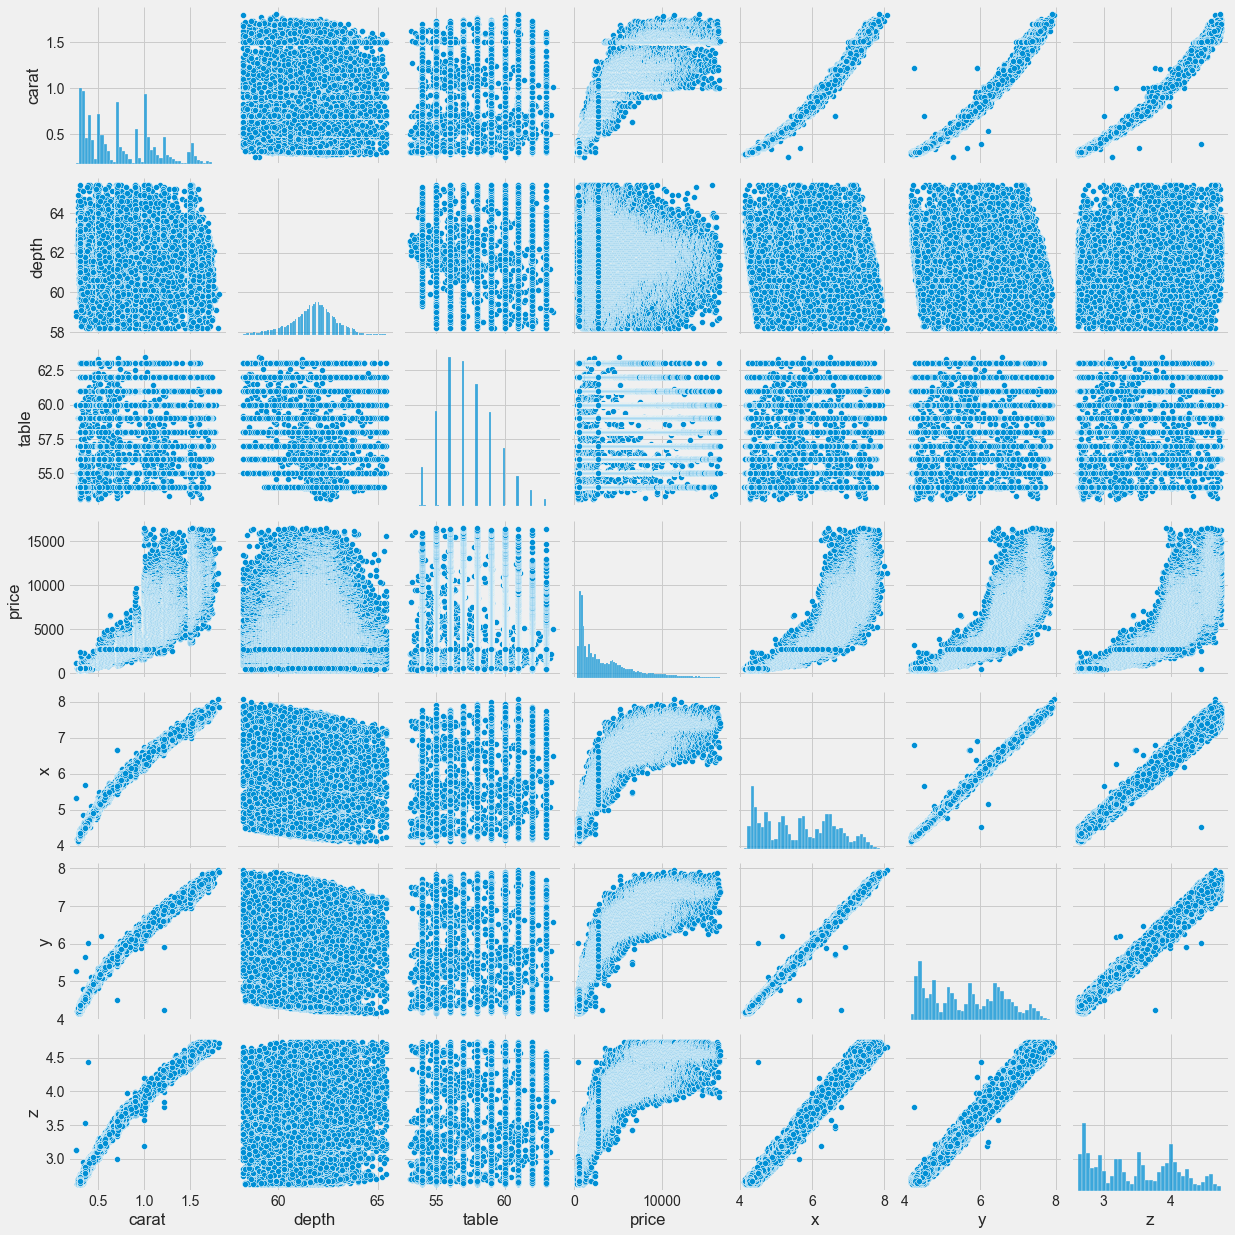

In [16]:
# hasil hubungan tiap kolom setelah menghilangkan outliers
sns.pairplot(data_no_outliers)

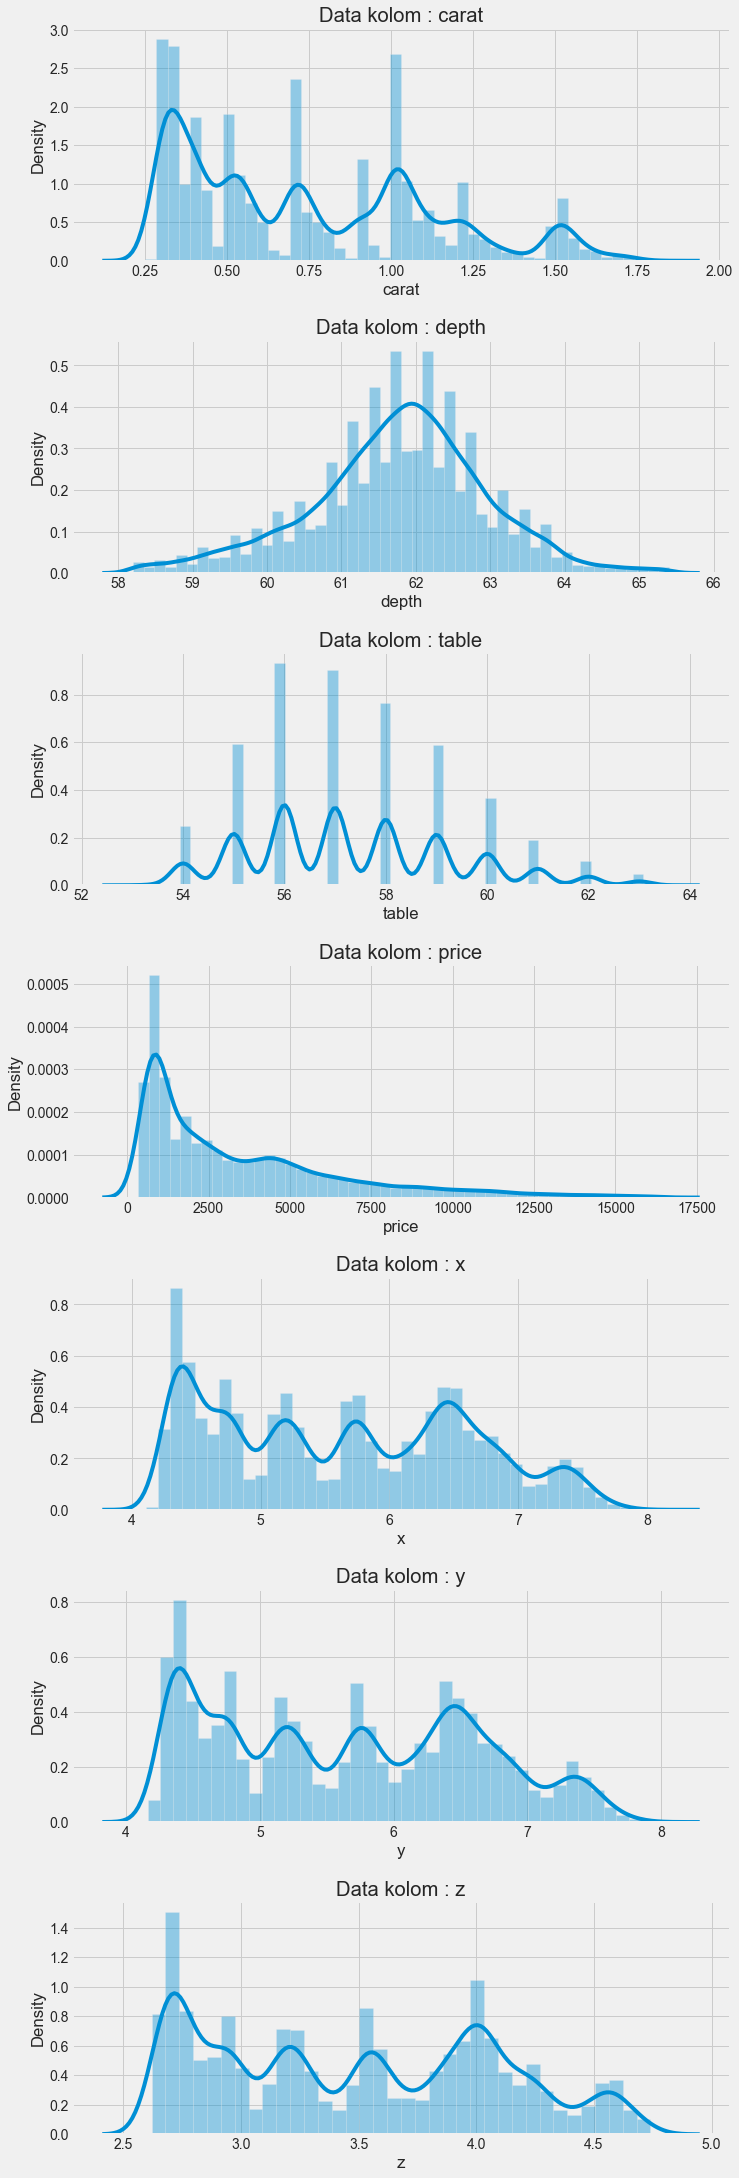

In [17]:
# persebaran data numerial setelah penghilangan outliers
fig, axes = plt.subplots(nrows=7, ncols=1, figsize = (10,30))
fig.tight_layout(h_pad=4)

for i, ax in enumerate(fig.axes):
    sns.distplot(data_no_outliers[kolom_num[i]], ax = ax)
    ax.set_title(f"Data kolom : {kolom_num[i]}")

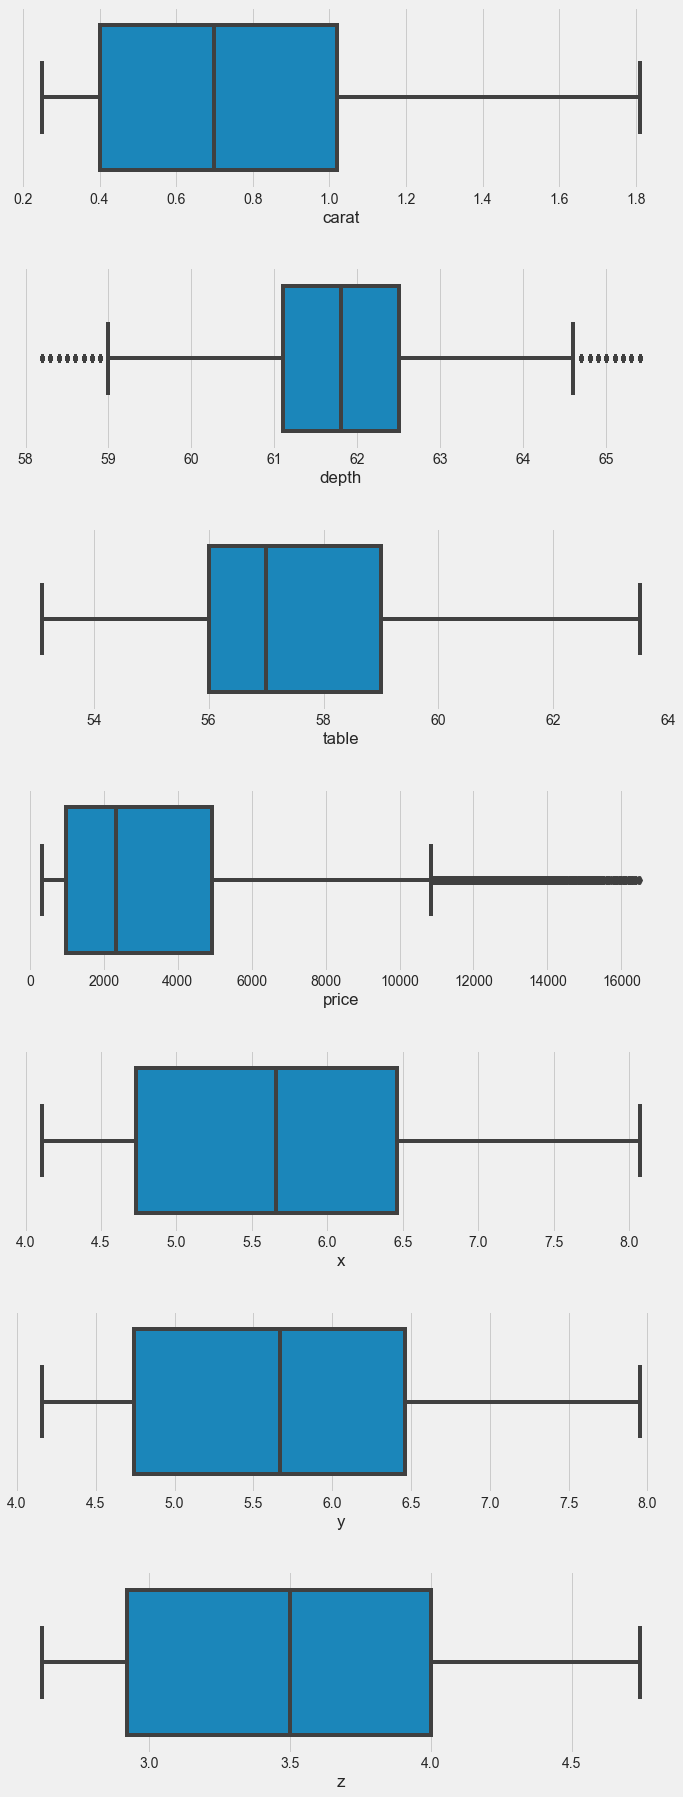

In [18]:
# boxplot data numerikal setelah menghilangkan outliers
fig, axes = plt.subplots(nrows=7, ncols=1, figsize = (10,25))
fig.tight_layout(h_pad=4)

for i, ax in enumerate(fig.axes):
    sns.boxplot(data_no_outliers[kolom_num[i]], ax = ax)

In [19]:
# boxplot, persebaran data kategorikal tiap kategori terhadap harga dari berlian, hasil dari plot akan menentukan bahwa data kategorikal akan diencode dengan ordinal encoding atau one hot encoding
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10,15))
fig.tight_layout(h_pad=4)

for i, ax in enumerate(fig.axes):
    sns.boxplot(data_no_outliers['price'], y = data_no_outliers[kolom_str[i]]
                , ax = ax)

In [20]:
# korelasi tiap kolom numerikal setelah penghilangan outliers
plt.figure(figsize = (10, 7))
sns.heatmap(data_no_outliers.corr(), annot= True)

<AxesSubplot:>

In [21]:
data_no_outliers

carat        cut color clarity  depth  table  price     x     y     z
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
13      0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
15      0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53789   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53790   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53791   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53792   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53793   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[47219 rows x 10 columns]

In [22]:
# dengan melihat x,y,z sangat erat hubungannya
# maka dari x,y,z dikalikan untuk hasilkan nilai berupa volume

data_no_outliers['volume'] = (data_no_outliers.x.values * data_no_outliers.y.values * data_no_outliers.z.values)
data_no_outliers['volume'] = data_no_outliers.volume.round(2)
data_no_outliers

carat        cut color clarity  depth  table  price     x     y     z  \
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73   
13      0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71   
15      0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53789   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53790   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53791   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53792   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53793   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       volume  
3       46.72  
4       51.92  
10      49.66  
13      51.52  
15      51.88  
...       ...  
53789  115.92  
53790  118.11  
53791  114.45  
53792  140.77  
53793  124.57  

[47219 rows x 11 columns]

In [23]:
# buat dataset ada volume tanpa x,y,z
# hapus kolom x,y,z dab gunakan kolom volume

data_no_outliers_volume = data_no_outliers.drop(['x','y','z'], axis = 'columns').copy()
data_no_outliers_volume

carat        cut color clarity  depth  table  price  volume
3       0.29    Premium     I     VS2   62.4   58.0    334   46.72
4       0.31       Good     J     SI2   63.3   58.0    335   51.92
10      0.30       Good     J     SI1   64.0   55.0    339   49.66
13      0.31      Ideal     J     SI2   62.2   54.0    344   51.52
15      0.32    Premium     E      I1   60.9   58.0    345   51.88
...      ...        ...   ...     ...    ...    ...    ...     ...
53789   0.72      Ideal     D     SI1   60.8   57.0   2757  115.92
53790   0.72       Good     D     SI1   63.1   55.0   2757  118.11
53791   0.70  Very Good     D     SI1   62.8   60.0   2757  114.45
53792   0.86    Premium     H     SI2   61.0   58.0   2757  140.77
53793   0.75      Ideal     D     SI2   62.2   55.0   2757  124.57

[47219 rows x 8 columns]

In [24]:
# data tanpa outliers akhir setelah menggunakan kolom volume
data_no_outliers_volume.describe()

carat         depth         table         price        volume
count  47219.000000  47219.000000  47219.000000  47219.000000  47219.000000
mean       0.743085     61.767236     57.345494   3454.215570    121.072143
std        0.377077      1.186779      1.989460   3158.589406     60.951740
min        0.250000     58.200000     53.100000    334.000000     45.420000
25%        0.400000     61.100000     56.000000    967.000000     65.690000
50%        0.700000     61.800000     57.000000   2319.000000    113.410000
75%        1.020000     62.500000     59.000000   4922.000000    166.095000
max        1.810000     65.400000     63.500000  16492.000000    298.970000

In [25]:
# data DENGAN Outliers
# pembautan data dengan Outliers ini karena pada model yang akan dilatih akan melihat perbandingan bagaimana jika model yang dibuat ditraining dengan data yang "belum dibersihkan"

data_with_outliers = data.copy()
data_with_outliers['volume'] = (data.x.values * data.y.values * data.z.values)
data_with_outliers.drop(['x','z','y'], axis = 'columns', inplace = True)
data_with_outliers

carat        cut color clarity  depth  table  price      volume
0       0.23      Ideal     E     SI2   61.5   55.0    326   38.202030
1       0.21    Premium     E     SI1   59.8   61.0    326   34.505856
2       0.23       Good     E     VS1   56.9   65.0    327   38.076885
3       0.29    Premium     I     VS2   62.4   58.0    334   46.724580
4       0.31       Good     J     SI2   63.3   58.0    335   51.917250
...      ...        ...   ...     ...    ...    ...    ...         ...
53789   0.72      Ideal     D     SI1   60.8   57.0   2757  115.920000
53790   0.72       Good     D     SI1   63.1   55.0   2757  118.110175
53791   0.70  Very Good     D     SI1   62.8   60.0   2757  114.449728
53792   0.86    Premium     H     SI2   61.0   58.0   2757  140.766120
53793   0.75      Ideal     D     SI2   62.2   55.0   2757  124.568444

[53794 rows x 8 columns]

#### Helper Function

Helper Function ini adalah fungsi buatan sendiri, yang tujuannya dibuat agar memudahkan proses kedepannya, fungsi yang dibuat adalah sebuah fungsi yang isinya dianggap akan digunakan secara repetitif kedepannya


In [26]:
#### ALL HELPER FUNCTION

#### --------------------------- PREPROCESSING HELPER FUNCTION --------------------------- ####

# kolom transformer -> return dataframe
def column_transformer_df(dataframe, scaler_column = [],
                          oneHot_column = [], ordinalEnc_column = [],
                          minmax_column = [], normalize_column = [],
                          robustScaler_column = []):
    columm_transformer = make_column_transformer(

        (StandardScaler(), scaler_column),
        (MinMaxScaler(), minmax_column),
        (OneHotEncoder(), oneHot_column),
        (OrdinalEncoder(), ordinalEnc_column),
        (Normalizer(), normalize_column),
        (RobustScaler(), robustScaler_column),
        remainder= "passthrough",
        n_jobs= -1

    )

    return pd.DataFrame(columm_transformer.fit_transform(dataframe))


# HELPER FUNCTION prepro(?)
def pipeline_colTransformer_trainTest_split(input, output, scaler_column = [], scale = True,
                                            oneHot_column = [], ordinalEnc_column = [],
                                            minmax_column = [], normalize_column = [],
                                            robustScaler_column = [],
                                            test_size = 0.2, shuffle = True,
                                            random_state = 42):
    '''
    FUngsi akan melakukan dua hal
    - Melakukan split pada kolom input dan target untuk jadikan train dan test
    - Hasil split input train dan test ditransform, alasannya melakukan split dahulu agar data testing tidak terkesan untuk menjadi "pseudo future" karena melakukan transform bersama dengan train data
    Fungsi ini akan menjadi pipeline untuk sambungkan 2 fungsi \n
    - fungsi split data  ( train_test_split )
    - fungsi transformer ( column_transformer_df ) ( jika dibutuhkan )

    '''

    # split jadi train dan test data dahulu
    x_train, x_test, y_train, y_test = train_test_split(input, output,
                                                        shuffle= shuffle, test_size= test_size,
                                                        random_state= random_state)

    # jika dibutuhkan scaling pada hasil split maka kerjakan, jika tidak tidak
    #if scaling == True:
    # lakukan looping terhadapa data X (input) pada data hasil split
    data_input = [x_train, x_test]
    data_input_output = []
    if scale:
        for i in range(2):
            input = column_transformer_df(scaler_column= scaler_column,
                                          oneHot_column= oneHot_column,
                                          ordinalEnc_column= ordinalEnc_column,
                                          minmax_column= minmax_column,
                                          normalize_column= normalize_column,
                                          robustScaler_column= robustScaler_column,
                                          dataframe= data_input[i])
            data_input_output.append(input)

    else:
        data_input_output = data_input

    return data_input_output[0], data_input_output[1], y_train, y_test






#### ------------------------------ EVALUATING HELPER FUNCTION ----------------------------- ####


# Get all metrik
def get_all_metrik(y_pred , y_true):
    mae = mean_absolute_error(y_true= y_true, y_pred= y_pred)
    mse = mean_squared_error(y_true= y_true, y_pred= y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_pred= y_pred, y_true= y_true)
    medAE = median_absolute_error(y_true= y_true, y_pred= y_pred)
    r2 = r2_score(y_true= y_true, y_pred= y_pred)
    adjs_r2 = 1 - ((1 - r2)*(len(y_pred) - 1) / (len(y_pred) - 1 - 1))

    metrik_dict = {
        'mae' : mae,
        'mse' : mse,
        'rmse' : rmse,
        'mape' : mape,
        'medAE' : medAE,
        'R2-Score' : r2,
        'Adjs-R2' : adjs_r2
    }

    return metrik_dict



def rekap_prediksi(model, x_test, y_true):
    '''
    Akan melakukan prediksi dan kemudian membuat dataframe berisi
    - Hasil prediksi
    - Nilai Asli
    - Selisih Absolut
    - Persentase perbedaan antara hasil prediksi dan label asli
    :return:
    '''
    prediksi = pd.DataFrame(model.predict(x_test)).round(0).astype('int')
    prediksi['asli'] = y_true.reset_index(drop = True)
    prediksi.columns = ['prediksi', 'asli']
    prediksi['selisih_absolut'] = abs(prediksi['asli'].values - prediksi['prediksi'].values)
    prediksi['perc_diff'] = (prediksi['selisih_absolut'].values / prediksi.asli.values * 100).round(2)

    return prediksi




def get_best_worst_prediction(model, x_test, y_true, jumlah_data = 250):
    '''
    Fungsi akan mengambalikan sejumlah N data dari hasil prediksi dan terburuk jika dibandingkan dengan data aslinya
    Catatan :
    Fungsi ini dependent dengan fungsi lain yaitu menggunakan fungsi
    rekap_prediksi()
    return:: best_n, worst_n
    '''
    prediksi = rekap_prediksi(model = model, x_test= x_test, y_true= y_true)
    best_n = prediksi.sort_values('perc_diff')[:jumlah_data].reset_index(drop = True)
    worst_n = prediksi.sort_values('perc_diff', ascending = False)[:jumlah_data].reset_index(drop = True)

    return best_n, worst_n



# fungsi plot n_data bersama dengan scatter plot seluruh data
def plot_n_data_with_scatter(y_pred, y_true, jumlah_data = 200):
    fig, ax = plt.subplots(nrows= 2, ncols=1, figsize = (12, 10))
    fig.tight_layout(h_pad= 3)
    ax[0].plot(y_pred[:jumlah_data])
    ax[0].plot(y_true[:jumlah_data])
    ax[0].title.set_text('Perbandingan Hasil Prediksi dan Nilai Asli')

    ax[1].scatter(x = y_pred, y = y_true)
    ax[1].title.set_text('Hasil perbandingan Scatter \nSeluruh Prediksi')
    ax[1].plot([0,16000], [0,16000], c = 'black', ls = '--')



def best_worst_comparison_plot(model, x_test, y_test, jumlah_data = 250):
    '''
    Seperti sebelumnya ada yang sama, fungsi ini juga akan dependent dengan fungsi lain untuk memudahkan penulisan dan efisiensi kode, akan bergantung dengan fungsi
    Fungsi bergantung dengan
    get_best_worst_prediction()
    '''
    best_n, worst_n = get_best_worst_prediction(model= model, x_test= x_test, y_true= y_test,
                                                jumlah_data= jumlah_data)
    fig, ax = plt.subplots(nrows=2, ncols=2 , figsize = (18, 12))
    fig.tight_layout(h_pad= 3)
    ax[0][0].plot(best_n.prediksi)
    ax[0][0].plot(best_n.asli)
    ax[0][0].title.set_text(f'Model dengan hasil prediksi terbaik \ndengan sampel data sebanyak {jumlah_data} data')
    ax[0][1].scatter(x = best_n.prediksi, y = best_n.asli)
    ax[0][1].plot([0, 16000], [0,16000], ls = '--', c = 'black')
    ax[0][1].title.set_text('Scatter hasil prediksi terbaik')

    ax[1][0].plot(worst_n.prediksi)
    ax[1][0].plot(worst_n.asli)
    ax[1][0].title.set_text(f'Model dengan hasil prediksi terburuk \ndengan sampel data sebanyak {jumlah_data} data')
    ax[1][1].scatter(x = worst_n.prediksi, y = worst_n.asli)
    ax[1][1].plot([0, 16000], [0,16000], ls = '--', c = 'black')
    ax[1][1].title.set_text('Scatter hasil prediksi terburuk')

# Fungsi simpan best model saat proses training
import os
def save_best_model(model_name, save_path = 'best_model_experimetns'):
    return tf.keras.callbacks.ModelCheckpoint(filepath= os.path.join(save_path, model_name),
                                              save_best_only= True)

### Transform Data

In [27]:
# data dengan outliers
data_x_outliers = data_with_outliers.drop('price', axis = 'columns')
data_y_outliers = data_with_outliers['price']

In [28]:
# data tanpa outliers
data_x = data_no_outliers_volume.drop("price", axis = "columns")
data_y = data_no_outliers_volume['price']

In [29]:
# set kolom dan nama kolom untuk input split data dan transform data
scaler = ['carat', 'depth', 'table', 'volume']
oneHot = []
OrdinalEnc = ['cut', 'color', 'clarity']

#### Transform data non-Outliers

##### With Scaling

In [30]:
xTrain_nontOutliers, xTest_nonOutliers, yTrain_nonOutliers, yTest_nonOutliers = pipeline_colTransformer_trainTest_split(input= data_x, output= data_y, scale= True,
                                                                                                                                           minmax_column= scaler,
                                                                                                                                           ordinalEnc_column= OrdinalEnc
                                                                                                                                           )

xTrain_nontOutliers.shape, xTest_nonOutliers.shape, yTrain_nonOutliers.shape, yTest_nonOutliers.shape

((37775, 7), (9444, 7), (37775,), (9444,))

In [31]:
xTrain_nontOutliers, yTrain_nonOutliers

(              0         1         2         3    4    5    6
 0      0.169935  0.125000  0.567308  0.167620  4.0  0.0  2.0
 1      0.039216  0.472222  0.182692  0.041609  2.0  3.0  1.0
 2      0.156863  0.680556  0.375000  0.151173  4.0  1.0  5.0
 3      0.411765  0.583333  0.086538  0.408519  2.0  3.0  5.0
 4      0.241830  0.319444  0.375000  0.240150  2.0  4.0  1.0
 ...         ...       ...       ...       ...  ...  ...  ...
 37770  0.490196  0.597222  0.278846  0.477381  4.0  4.0  5.0
 37771  0.320261  0.527778  0.278846  0.303964  4.0  5.0  2.0
 37772  0.150327  0.638889  0.759615  0.133307  3.0  5.0  6.0
 37773  0.326797  0.013889  0.951923  0.323368  4.0  3.0  5.0
 37774  0.627451  0.583333  0.471154  0.603471  4.0  4.0  5.0
 
 [37775 rows x 7 columns],
 43292    1415
 38792    1052
 45161    1662
 7864     4309
 51680    2420
          ... 
 12259    5217
 51065    2352
 43966    1556
 985      2896
 17113    6848
 Name: price, Length: 37775, dtype: int64)

#### Transform data with outliers with scaling

##### wihout scaling

In [32]:
xTrain_outliersnoscale, xTest_Outliersnoscale, yTrain_Outliersnoscale, yTest_Outliersnoscale = pipeline_colTransformer_trainTest_split(data_x_outliers, data_y_outliers, scale = True,
                                                                                                           ordinalEnc_column= OrdinalEnc)

xTrain_outliersnoscale.shape, xTest_Outliersnoscale.shape, yTrain_Outliersnoscale.shape, yTest_Outliersnoscale.shape

((43035, 7), (10759, 7), (43035,), (10759,))

In [33]:
xTrain_outliersnoscale, yTrain_Outliersnoscale

(         0    1    2     3     4     5           6
 0      2.0  0.0  5.0  0.35  62.0  55.0   56.494989
 1      2.0  0.0  3.0  2.21  62.0  57.0  359.862888
 2      2.0  1.0  5.0  0.53  60.0  57.0   87.759520
 3      3.0  0.0  2.0  0.80  61.7  58.0  129.708076
 4      2.0  1.0  6.0  0.41  61.5  56.0   68.625232
 ...    ...  ...  ...   ...   ...   ...         ...
 43030  3.0  4.0  5.0  1.00  60.4  58.0  164.854032
 43031  2.0  3.0  2.0  0.63  61.7  54.0  104.963904
 43032  2.0  6.0  2.0  0.32  61.8  54.9   52.778336
 43033  3.0  6.0  2.0  0.90  62.8  59.0  141.202098
 43034  3.0  3.0  4.0  1.01  62.7  58.0  159.322452
 
 [43035 rows x 7 columns],
 33451      829
 26689    16558
 45777     1721
 3064      3312
 43692     1444
          ...  
 11284     4984
 44732     1628
 38158      384
 860       2871
 15795     6335
 Name: price, Length: 43035, dtype: int64)

In [34]:
xTrain_outliersnoscale.shape, xTest_Outliersnoscale.shape

((43035, 7), (10759, 7))

### Buat, Train, Testing, dan Evaluate Model

In [35]:
def model_arsitektur(model_name):
    model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(1)
    ], name = model_name)

    return model

### Buat model NN

In [36]:
# cari learning rate "terbaik" untuk digunakan sebagai base learning pada model utama
tf.random.set_seed(42)

model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(1)

])

model.compile(loss = [tf.keras.losses.mean_absolute_error, tf.keras.losses.mean_squared_error],
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae', 'mse'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))
history_cari_lr = model.fit(xTrain_nontOutliers,
                            yTrain_nonOutliers,
                            epochs=100,
                            callbacks=[lr_scheduler],
                            verbose= 2)

Epoch 1/100
1181/1181 - 5s - loss: 717.5389 - mae: 717.5389 - mse: 1943153.6250 - lr: 0.0010 - 5s/epoch - 5ms/step
Epoch 2/100
1181/1181 - 3s - loss: 428.5437 - mae: 428.5437 - mse: 567519.9375 - lr: 0.0011 - 3s/epoch - 3ms/step
Epoch 3/100
1181/1181 - 3s - loss: 387.0276 - mae: 387.0276 - mse: 439286.3438 - lr: 0.0013 - 3s/epoch - 3ms/step
Epoch 4/100
1181/1181 - 3s - loss: 359.7978 - mae: 359.7978 - mse: 380411.1250 - lr: 0.0014 - 3s/epoch - 3ms/step
Epoch 5/100
1181/1181 - 3s - loss: 340.0156 - mae: 340.0156 - mse: 342822.2500 - lr: 0.0016 - 3s/epoch - 3ms/step
Epoch 6/100
1181/1181 - 4s - loss: 336.3468 - mae: 336.3468 - mse: 325844.7812 - lr: 0.0018 - 4s/epoch - 3ms/step
Epoch 7/100
1181/1181 - 3s - loss: 342.0655 - mae: 342.0655 - mse: 336907.3438 - lr: 0.0020 - 3s/epoch - 3ms/step
Epoch 8/100
1181/1181 - 4s - loss: 332.2039 - mae: 332.2039 - mse: 315595.3750 - lr: 0.0022 - 4s/epoch - 3ms/step
Epoch 9/100
1181/1181 - 3s - loss: 328.2183 - mae: 328.2183 - mse: 311694.2188 - lr: 0.

In [37]:
plt.figure(figsize = (7, 5))
plt.semilogx(history_cari_lr.history['lr'], history_cari_lr.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('MAE')

Text(0, 0.5, 'MAE')

In [38]:
# hasil model ketika menghasilkan loss terendah pakai lr berapa
history_df = pd.DataFrame(history_cari_lr.history)
history_df.sort_values("loss", ascending= True).head()

loss         mae           mse        lr
8   328.218323  328.218323  311694.21875  0.002512
10  329.701935  329.701935  313132.87500  0.003162
9   332.023804  332.023804  315750.21875  0.002818
7   332.203857  332.203857  315595.37500  0.002239
5   336.346802  336.346802  325844.78125  0.001778

## Train dan Evaluasi Model

Proses training dan evaluasi model, agar semua model yang dibuat bisa dibandingkan dengan cukup jelas, maka ada beberapa parameter yang diset agar hasil dapat dibandingkan dengan jelas, parameter yang digunakan sama pada semua model adalah

- Epoch = 300
- Learning Rate Awal = 0.001 ( didapat dari percobaan pencarian lr optimal di atas )
- Validation Size = 20%
- Learning Rate Scheduler ( Jika pakai )
if epoch < 15: learning rate = 0.001
if epoch >= 15 and learning rate > 0.0001: learning rate = learning rate * exp(-0.1)
if learning rate < 0.00001 : learning rate = 0.0001
- Batch Size training = 128
- Loss target = MAE
- Optimizers = Adam Optimizer
- Metric evaluation Training = MAE dan MSE
- Metric evaluation testing = MAE, MSE, RMSE, MAPE, MedAE, R2 Score, Adjusted R2 Score


#### Workflow
Workflow ini akan berisi tahapan saat training model dan evaluasi model, dimana tiap model akan melakukan workflow yang sama untuk alasan konsistensi, berikut adalah workflow yang dilakukan pada tiap model
- Buat Model, Compile, dan Fitting Model
- Plot "perjalanan" Loss dan Validation Loss
- Evaluasi Model dengan Testing Dataset
- Buat Prediksi Terhadap Testing Dataset
- Buat Rekap Hasil Prediksi terhadap Data Target Testing
- Hitung Nilai Metrik Evaluasi Model pada Data Testing
- Plot hasil Prediksi Terhadap Data Asli dan juga Plot semua data hasil prediksi dan data asli pada scatter plot
- Mencari hasil n Hasil Prediksi terbaik dan N hasil Prediksi terburuk dan lakukan plot pada lineplot dan scatter plot untuk masing - masing hasil

### Model dengan Adaptive Learning Rate

#### Train Model data dengan Data Preprocessing

In [39]:
# Buat Model dan Compile Model

# menentukan layer dalam NN
# https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3

# design NN
# https://www.kdnuggets.com/2019/11/designing-neural-networks.html
tf.random.set_seed(42)

model1 = model_arsitektur('Dense_ALR_NonOutliers')

# compile model yang akan digunakan dan set learning rate berdasarkan lr yang sudah 
# ditemukan sebelumnya di atas dibulatkan ke satuan terdekat
model1.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mape', 'mse'])


def lr_scheduler(epoch, lr):
    if epoch < 15:
        return lr
    if lr < 1e-4:
        return 1e-4
    else:
        return lr * tf.math.exp(-0.1)
        

# bahas ttg early_stopping
# https://stats.stackexchange.com/questions/231061/how-to-use-early-stopping-properly-for-training-deep-neural-network
lr_scheduler_riil = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=15)

In [40]:
# Train Model
history_real_df = model1.fit(xTrain_nontOutliers,
                             yTrain_nonOutliers,
                             validation_data = (xTest_nonOutliers, yTest_nonOutliers),
                             validation_split=0.2,
                             batch_size = 128,
                             epochs = 300,
                             verbose=2, shuffle=True,
                             callbacks = [lr_scheduler_riil
                                          , save_best_model(model_name= model1.name)
                                          #, early_stopping
                                          ])

Epoch 1/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_NonOutliers\assets
296/296 - 7s - loss: 1179.7301 - mape: 44.4718 - mse: 4688410.5000 - val_loss: 551.1372 - val_mape: 18.3097 - val_mse: 921951.5000 - lr: 0.0010 - 7s/epoch - 25ms/step
Epoch 2/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_NonOutliers\assets
296/296 - 5s - loss: 480.6372 - mape: 14.9095 - mse: 739667.4375 - val_loss: 451.8730 - val_mape: 13.3499 - val_mse: 723618.5625 - lr: 0.0010 - 5s/epoch - 17ms/step
Epoch 3/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_NonOutliers\assets
296/296 - 4s - loss: 456.5128 - mape: 14.0130 - mse: 658249.4375 - val_loss: 417.8554 - val_mape: 11.9208 - val_mse: 654193.0625 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 4/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_NonOutliers\assets
296/296 - 5s - loss: 401.7048 - mape: 12.4491 - mse: 514877.5625 - val_loss: 372.3512 - val_mape: 11.4612 -

Text(0.5, 0, 'Epoch')

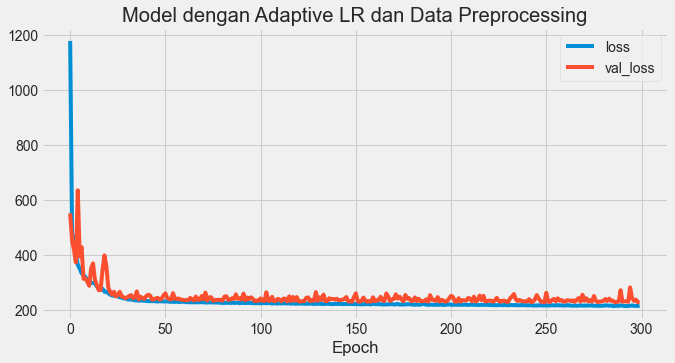

In [41]:
# Plot hasil "perjalanan" model pada data training ( loss ) dan data testing / validasi ( val_loss )

pd.DataFrame(history_real_df.history)[['loss', 'val_loss']].plot(figsize = (10,5))
plt.title("Model dengan Adaptive LR dan Data Preprocessing")
plt.xlabel('Epoch')

In [42]:
pd.DataFrame(history_real_df.history)

loss       mape           mse    val_loss   val_mape  \
0    1179.730103  44.471809  4.688410e+06  551.137207  18.309721   
1     480.637238  14.909518  7.396674e+05  451.873047  13.349881   
2     456.512817  14.012995  6.582494e+05  417.855438  11.920821   
3     401.704803  12.449060  5.148776e+05  372.351166  11.461164   
4     363.287903  11.495320  4.189167e+05  635.166992  23.485945   
..           ...        ...           ...         ...        ...   
295   215.365097   6.998066  1.562475e+05  242.428864   8.395086   
296   213.727890   6.954983  1.534519e+05  231.734573   7.844149   
297   213.623016   6.953729  1.542410e+05  236.432663   7.990314   
298   213.433517   6.946921  1.534051e+05  227.411850   7.643538   
299   214.638077   6.980640  1.541014e+05  226.886032   7.419736   

           val_mse      lr  
0    921951.500000  0.0010  
1    723618.562500  0.0010  
2    654193.062500  0.0010  
3    480250.750000  0.0010  
4    857548.312500  0.0010  
..             ...     ...  
295  181784.437500  0.0001  
296  171835.859375  0.0001  
297  176195.640625  0.0001  
298  165731.078125  0.0001  
299  165868.718750  0.0001  

[300 rows x 7 columns]

In [43]:
model1 = tf.keras.models.load_model('best_model_experimetns\Dense_ALR_NonOutliers')

In [44]:
# Evaluasi Model dengan Data Testing
model1.evaluate(xTest_nonOutliers, yTest_nonOutliers)

296/296 [==============================] - 1s 2ms/step - loss: 226.3907 - mape: 7.4949 - mse: 166295.1562


[226.3907470703125, 7.494875431060791, 166295.15625]

In [45]:
# Buat prediksi dan lakukan rekap hasil prediksi dengan data testing terhadap data target testing
prediksi_rekap_test = rekap_prediksi(model1, xTest_nonOutliers, yTest_nonOutliers)
prediksi_rekap_test

296/296 [==============================] - 1s 1ms/step


prediksi   asli  selisih_absolut  perc_diff
0          777    792               15       1.89
1         4687   4707               20       0.42
2         2585   2593                8       0.31
3         4134   4443              309       6.95
4          869    734              135      18.39
...        ...    ...              ...        ...
9439      1731   1708               23       1.35
9440      9208   9419              211       2.24
9441       434    436                2       0.46
9442      3402   4101              699      17.04
9443     13304  15497             2193      14.15

[9444 rows x 4 columns]

In [46]:
prediksi_rekap_test.describe()

prediksi          asli  selisih_absolut    perc_diff
count   9444.000000   9444.000000      9444.000000  9444.000000
mean    3434.802202   3426.227975       226.389560     7.495057
std     3131.665682   3148.496888       339.194003     7.274865
min      368.000000    335.000000         0.000000     0.000000
25%      937.000000    957.000000        45.000000     2.327500
50%     2326.500000   2282.000000       115.000000     5.180000
75%     4874.250000   4872.000000       256.000000    10.330000
max    16943.000000  16492.000000      4804.000000   135.260000

In [47]:
# Hitung Metrik Evaluasi pada Data Testing

all_metrik_scale_adaptive  = get_all_metrik(y_pred= prediksi_rekap_test.prediksi, y_true= prediksi_rekap_test.asli)
all_metrik_scale_adaptive

{'mae': 226.38955950868277,
 'mse': 166292.62166454893,
 'rmse': 407.78992344655717,
 'mape': 0.0749504293620316,
 'medAE': 115.0,
 'R2-Score': 0.9832230723290419,
 'Adjs-R2': 0.9832212954885768}

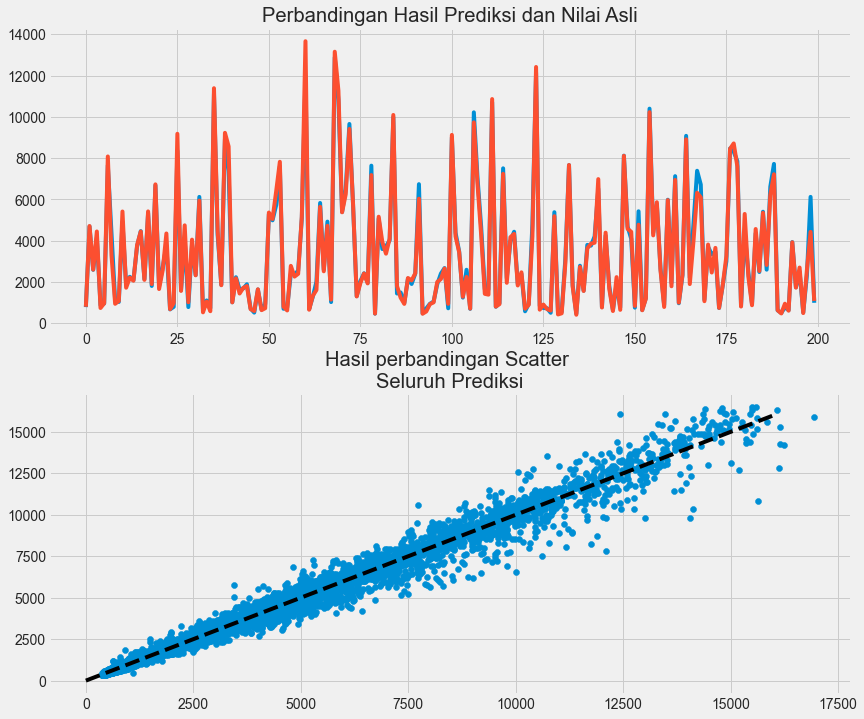

In [48]:
# Plot Fungsi Hasil prediksi terhadap data target testing pada lineplot dan scatter plot
plot_n_data_with_scatter(y_pred= prediksi_rekap_test.prediksi,
                         y_true= prediksi_rekap_test.asli,
                         jumlah_data=200)

In [49]:
# Cari n Hasil prediksi terbaik dan terburuk data testing
best_250_test, worst_250_test = get_best_worst_prediction(model1, xTest_nonOutliers, yTest_nonOutliers)

best_250_test

296/296 [==============================] - 0s 1ms/step


prediksi  asli  selisih_absolut  perc_diff
0         810   810                0       0.00
1        1207  1207                0       0.00
2         612   612                0       0.00
3        1267  1267                0       0.00
4         591   591                0       0.00
..        ...   ...              ...        ...
245       934   936                2       0.21
246      3256  3263                7       0.21
247      1828  1832                4       0.22
248      1841  1837                4       0.22
249      3661  3669                8       0.22

[250 rows x 4 columns]

In [50]:
worst_250_test

prediksi  asli  selisih_absolut  perc_diff
0        1101   468              633     135.26
1       12108  7840             4268      54.44
2        6415  4179             2236      53.51
3       10013  6543             3470      53.03
4        4560  3045             1515      49.75
..        ...   ...              ...        ...
245       744   589              155      26.32
246      1072   849              223      26.27
247       708   561              147      26.20
248       531   421              110      26.13
249       696   552              144      26.09

[250 rows x 4 columns]

In [51]:
# Plot hasil n prediksi terbaik dan terburuk data testing pada lineplot dan scatter plot

best_worst_comparison_plot(model= model1, x_test = xTest_nonOutliers, y_test = yTest_nonOutliers, jumlah_data=100)

296/296 [==============================] - 0s 2ms/step


### Train Model Tanpa Data Preprocessing

Perbedaan dengan model sebelum ini adalah Model yang ditraining kali ini dataset training dan testing tidak dilakukan data preprocessing dan tidak dihilangkan Outliers pada dataset yang digunakan

In [52]:
tf.random.set_seed(42)

model2 = model_arsitektur(model_name= 'Dense_ALR_OutliersNoScale')

model2.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mape', 'mse'])



def lr_scheduler(epoch, lr):
    if epoch < 15:
        return lr
    if lr < 1e-4:
        return 1e-4
    else:
        return lr * tf.math.exp(-0.1)
        

lr_scheduler_riil = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [53]:
history_real_df_nonscale_lr = model2.fit(xTrain_outliersnoscale,
                                         yTrain_Outliersnoscale,
                                         validation_data = (xTest_Outliersnoscale,
                                                            yTest_Outliersnoscale),
                                         validation_split=0.2,
                                         verbose=2,
                                         batch_size = 128,
                                         shuffle=True,
                                         epochs = 300,
                                         callbacks = [lr_scheduler_riil
                                                      , save_best_model(model2.name)
                                                      #, early_stopping
                                                      ])

Epoch 1/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_OutliersNoScale\assets
337/337 - 5s - loss: 1027.6312 - mape: 28.0727 - mse: 4691798.0000 - val_loss: 717.3864 - val_mape: 16.6516 - val_mse: 2017596.8750 - lr: 0.0010 - 5s/epoch - 14ms/step
Epoch 2/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_OutliersNoScale\assets
337/337 - 4s - loss: 684.9540 - mape: 16.8860 - mse: 2618628.0000 - val_loss: 707.8038 - val_mape: 16.1309 - val_mse: 1848977.3750 - lr: 0.0010 - 4s/epoch - 11ms/step
Epoch 3/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_OutliersNoScale\assets
337/337 - 4s - loss: 617.1957 - mape: 15.8619 - mse: 2284832.7500 - val_loss: 574.9773 - val_mape: 16.1999 - val_mse: 1273924.0000 - lr: 0.0010 - 4s/epoch - 11ms/step
Epoch 4/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_ALR_OutliersNoScale\assets
337/337 - 3s - loss: 602.3586 - mape: 15.4737 - mse: 2131545.0000 - val_loss: 558.0806

Text(0.5, 0, 'Epoch')

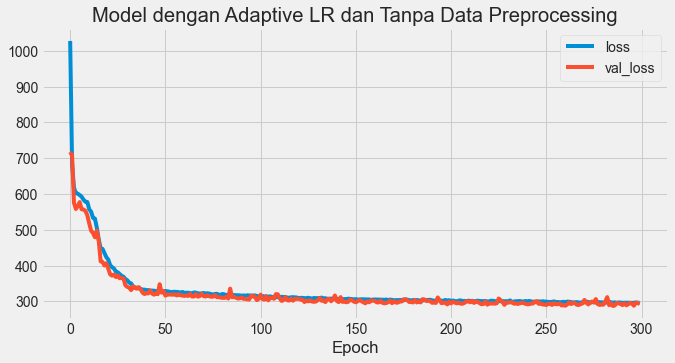

In [54]:
pd.DataFrame(history_real_df_nonscale_lr.history)[['loss', 'val_loss']].plot(figsize = (10,5))
plt.title("Model dengan Adaptive LR dan Tanpa Data Preprocessing")
plt.xlabel('Epoch')

In [55]:
pd.DataFrame(history_real_df_nonscale_lr.history)

loss       mape           mse    val_loss   val_mape  \
0    1027.631226  28.072706  4.691798e+06  717.386353  16.651602   
1     684.953979  16.885998  2.618628e+06  707.803772  16.130873   
2     617.195679  15.861928  2.284833e+06  574.977295  16.199944   
3     602.358582  15.473687  2.131545e+06  558.080627  14.788301   
4     600.719421  15.441067  1.875450e+06  566.197937  14.657670   
..           ...        ...           ...         ...        ...   
295   295.656921   8.156318  3.349244e+05  293.215790   8.234550   
296   295.995636   8.164229  3.356341e+05  287.817841   8.129305   
297   297.042358   8.172610  3.388094e+05  296.080994   8.135416   
298   295.830170   8.162395  3.355769e+05  295.039978   8.200074   
299   296.834747   8.177929  3.355049e+05  292.783905   8.224862   

          val_mse      lr  
0    2.017597e+06  0.0010  
1    1.848977e+06  0.0010  
2    1.273924e+06  0.0010  
3    1.253798e+06  0.0010  
4    1.218223e+06  0.0010  
..            ...     ...  
295  3.192828e+05  0.0001  
296  3.195161e+05  0.0001  
297  3.181152e+05  0.0001  
298  3.137372e+05  0.0001  
299  3.393426e+05  0.0001  

[300 rows x 7 columns]

In [56]:
model2 = tf.keras.models.load_model('best_model_experimetns\Dense_ALR_OutliersNoScale')

In [57]:
model2.evaluate(xTest_Outliersnoscale,
                yTest_Outliersnoscale)

337/337 [==============================] - 1s 2ms/step - loss: 286.8769 - mape: 8.1682 - mse: 308918.1562


[286.8769226074219, 8.168206214904785, 308918.15625]

In [58]:
prediksi_model2 = rekap_prediksi(model2, xTest_Outliersnoscale, yTest_Outliersnoscale)
prediksi_model2

337/337 [==============================] - 1s 1ms/step


prediksi   asli  selisih_absolut  perc_diff
0          1778   1435              343      23.90
1          3521   3584               63       1.76
2          1875   1851               24       1.30
3          1699   1590              109       6.86
4          5490   5690              200       3.51
...         ...    ...              ...        ...
10754      1291   1249               42       3.36
10755      1511   1428               83       5.81
10756       898    912               14       1.54
10757     14767  15002              235       1.57
10758      1066   1071                5       0.47

[10759 rows x 4 columns]

In [59]:
prediksi_model2.describe()

prediksi          asli  selisih_absolut     perc_diff
count  10759.000000  10759.000000     10759.000000  10759.000000
mean    3890.910958   3885.793568       286.877219      8.168169
std     3913.145110   3904.290849       476.067298      7.601227
min      352.000000    335.000000         0.000000      0.000000
25%      914.000000    952.500000        51.000000      2.690000
50%     2445.000000   2436.000000       126.000000      5.890000
75%     5217.000000   5246.500000       312.500000     11.720000
max    19597.000000  18791.000000      8676.000000    100.460000

In [60]:
model2_metrik = get_all_metrik(prediksi_model2.prediksi, prediksi_model2.asli)
model2_metrik

{'mae': 286.8772190724045,
 'mse': 308917.54586857517,
 'rmse': 555.8035137245672,
 'mape': 0.08168166568615473,
 'medAE': 126.0,
 'R2-Score': 0.9797325729748656,
 'Adjs-R2': 0.9797306888596824}

In [61]:
best_model2, worst_model2 = get_best_worst_prediction(model2, xTest_Outliersnoscale,
                                                      yTest_Outliersnoscale)

best_model2

337/337 [==============================] - 0s 1ms/step


prediksi  asli  selisih_absolut  perc_diff
0         432   432                0       0.00
1        1043  1043                0       0.00
2         680   680                0       0.00
3         631   631                0       0.00
4        5502  5502                0       0.00
..        ...   ...              ...        ...
245      4204  4194               10       0.24
246      1260  1263                3       0.24
247       825   827                2       0.24
248      3200  3192                8       0.25
249      5230  5217               13       0.25

[250 rows x 4 columns]

In [62]:
worst_model2

prediksi   asli  selisih_absolut  perc_diff
0        5703   2845             2858     100.46
1        1076   9752             8676      88.97
2        4022   2180             1842      84.50
3         531   2160             1629      75.42
4         504   1776             1272      71.62
..        ...    ...              ...        ...
245       659    517              142      27.47
246      2301   1806              495      27.41
247       806   1110              304      27.39
248      3580   2812              768      27.31
249     14484  11379             3105      27.29

[250 rows x 4 columns]

In [63]:
plot_n_data_with_scatter(prediksi_model2.prediksi, prediksi_model2.asli)

337/337 [==============================] - 1s 1ms/step


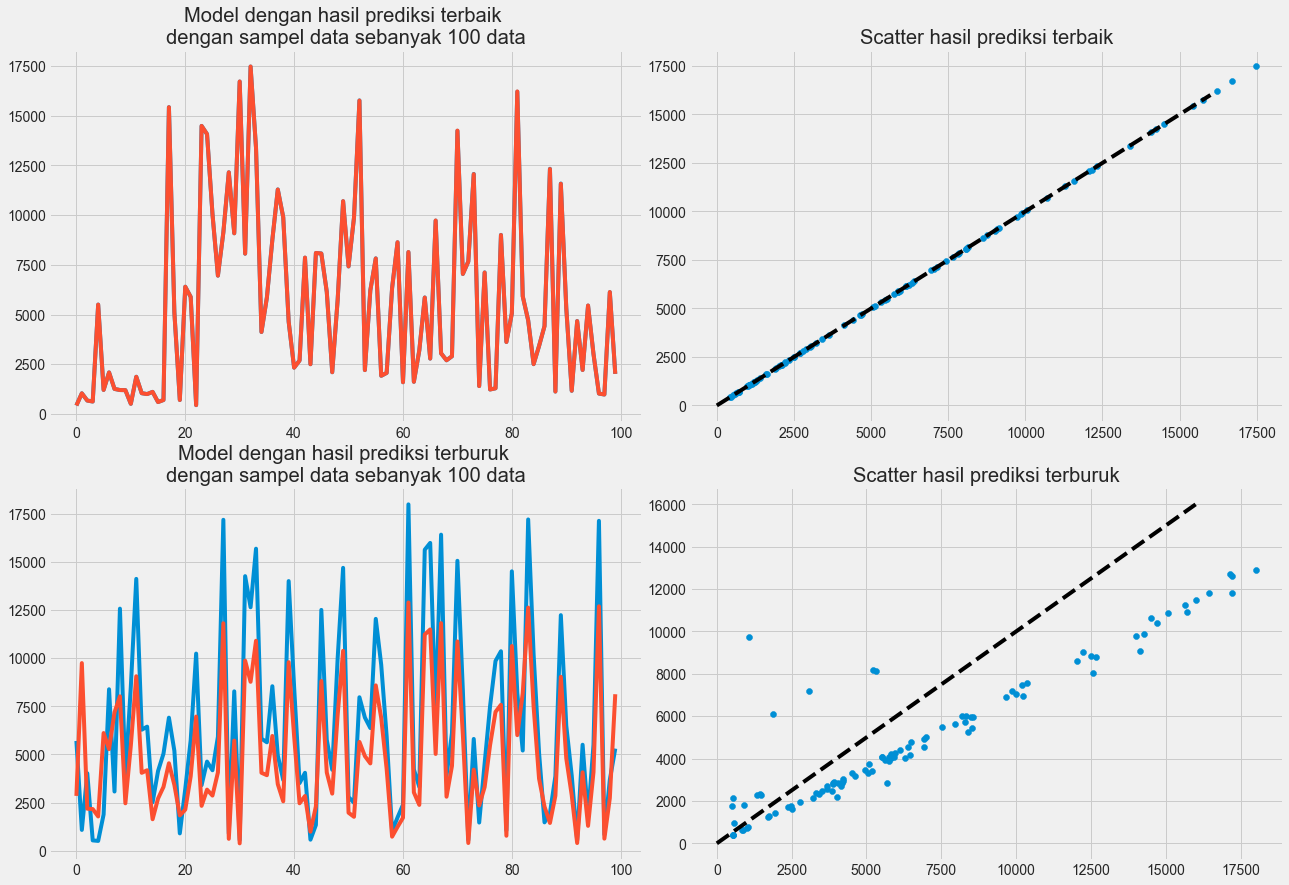

In [64]:
best_worst_comparison_plot(model2, xTest_Outliersnoscale, yTest_Outliersnoscale,
                           jumlah_data= 100)

## Tanpa Adaptive Learning Rate
Pada skenario nomor dua ini, bentuk dan arsitektur serta pengaturan modelnya akan sama dengan masing - masing dua model pertama di atas tadi, hanya saja semua model yang ditraining ini tidak menggunakan Learning Rate Scheduler sehingga pada proses training dari awal hingga akhir akan menggunakan Learning Rate yang konstan

#### Train Model data dengan Data Preprocessing

In [65]:
tf.random.set_seed(42)

model3 = model_arsitektur(model_name = 'Dense_noALR_noOutliers')

model3.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mape', 'mse'])

In [66]:
history_real_scale_nonlr = model3.fit(xTrain_nontOutliers,
                                      yTrain_nonOutliers,
                                      validation_data= (xTest_nonOutliers, yTest_nonOutliers),
                                      validation_split=0.2,
                                      batch_size = 128,
                                      verbose=2,
                                      shuffle=True,
                                      epochs = 300,
                                      use_multiprocessing = True,
                                      callbacks = [ save_best_model(model_name = model3.name)
                                          #,early_stopping
                                                   ])

Epoch 1/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_noOutliers\assets
296/296 - 7s - loss: 1179.7301 - mape: 44.4718 - mse: 4688410.5000 - val_loss: 551.1372 - val_mape: 18.3097 - val_mse: 921951.5000 - 7s/epoch - 24ms/step
Epoch 2/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_noOutliers\assets
296/296 - 4s - loss: 480.6372 - mape: 14.9095 - mse: 739667.4375 - val_loss: 451.8730 - val_mape: 13.3499 - val_mse: 723618.5625 - 4s/epoch - 14ms/step
Epoch 3/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_noOutliers\assets
296/296 - 4s - loss: 456.5128 - mape: 14.0130 - mse: 658249.4375 - val_loss: 417.8554 - val_mape: 11.9208 - val_mse: 654193.0625 - 4s/epoch - 14ms/step
Epoch 4/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_noOutliers\assets
296/296 - 5s - loss: 401.7048 - mape: 12.4491 - mse: 514877.5625 - val_loss: 372.3512 - val_mape: 11.4612 - val_mse: 480250.7500 - 5s/epoch - 

In [67]:
pd.DataFrame(history_real_scale_nonlr.history)[['loss',  'val_loss']].plot(figsize = (10,5))
plt.title("Model Tanpa Adaptive LR dan Dengan Data Preprocessing")
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

In [68]:
pd.DataFrame(history_real_scale_nonlr.history)

loss       mape           mse    val_loss   val_mape  \
0    1179.730103  44.471809  4.688410e+06  551.137207  18.309721   
1     480.637238  14.909518  7.396674e+05  451.873047  13.349881   
2     456.512817  14.012995  6.582494e+05  417.855438  11.920821   
3     401.704803  12.449060  5.148776e+05  372.351166  11.461164   
4     363.287903  11.495320  4.189167e+05  635.166992  23.485945   
..           ...        ...           ...         ...        ...   
295   209.987198   6.822334  1.482520e+05  231.187744   7.669845   
296   209.341888   6.844122  1.464597e+05  259.854370   9.351382   
297   207.571930   6.751940  1.458724e+05  261.605072   9.053009   
298   209.683884   6.805876  1.479262e+05  229.037399   7.651635   
299   207.028412   6.752462  1.453762e+05  229.259689   7.495474   

           val_mse  
0    921951.500000  
1    723618.562500  
2    654193.062500  
3    480250.750000  
4    857548.312500  
..             ...  
295  172862.625000  
296  195440.921875  
297  207816.078125  
298  171336.546875  
299  164839.671875  

[300 rows x 6 columns]

In [69]:
model3 = tf.keras.models.load_model('best_model_experimetns\Dense_noALR_noOutliers')

In [70]:
model3.evaluate(xTrain_nontOutliers,
                yTrain_nonOutliers)

1181/1181 [==============================] - 3s 2ms/step - loss: 202.9535 - mape: 6.5711 - mse: 141179.2344


[202.95352172851562, 6.571079254150391, 141179.234375]

In [71]:
prediksi_model3 = rekap_prediksi(model3, xTest_nonOutliers, yTest_nonOutliers)
prediksi_model3

296/296 [==============================] - 1s 2ms/step


prediksi   asli  selisih_absolut  perc_diff
0          783    792                9       1.14
1         4782   4707               75       1.59
2         2511   2593               82       3.16
3         4239   4443              204       4.59
4          883    734              149      20.30
...        ...    ...              ...        ...
9439      1676   1708               32       1.87
9440      9180   9419              239       2.54
9441       433    436                3       0.69
9442      3596   4101              505      12.31
9443     13425  15497             2072      13.37

[9444 rows x 4 columns]

In [72]:
prediksi_model3.describe()

prediksi          asli  selisih_absolut    perc_diff
count   9444.000000   9444.000000      9444.000000  9444.000000
mean    3444.956904   3426.227975       223.482423     7.385188
std     3161.852024   3148.496888       339.694029     7.319201
min      345.000000    335.000000         0.000000     0.000000
25%      936.000000    957.000000        43.000000     2.280000
50%     2323.000000   2282.000000       112.000000     5.070000
75%     4918.250000   4872.000000       250.000000    10.040000
max    17588.000000  16492.000000      4829.000000   127.780000

In [73]:
model3_metrik = get_all_metrik(prediksi_model3.prediksi, prediksi_model3.asli)
model3_metrik

{'mae': 223.4824227022448,
 'mse': 165324.20775095298,
 'rmse': 406.60079654490715,
 'mape': 0.07385200921554809,
 'medAE': 112.0,
 'R2-Score': 0.9833207736583092,
 'Adjs-R2': 0.9833190071653689}

In [74]:
plot_n_data_with_scatter(prediksi_model3.prediksi, prediksi_model3.asli)

In [75]:
best_model3, worst_model3 = get_best_worst_prediction(model3, xTest_nonOutliers, yTest_nonOutliers)
best_model3

296/296 [==============================] - 2s 6ms/step


prediksi   asli  selisih_absolut  perc_diff
0        3338   3338                0       0.00
1        3091   3091                0       0.00
2         959    959                0       0.00
3        1981   1981                0       0.00
4        1654   1654                0       0.00
..        ...    ...              ...        ...
245      1143   1140                3       0.26
246       766    764                2       0.26
247      1887   1892                5       0.26
248       773    771                2       0.26
249     10952  10922               30       0.27

[250 rows x 4 columns]

In [76]:
worst_model3

prediksi  asli  selisih_absolut  perc_diff
0        1066   468              598     127.78
1         772   452              320      70.80
2         579   361              218      60.39
3        3096  1932             1164      60.25
4       10472  6543             3929      60.05
..        ...   ...              ...        ...
245       860   682              178      26.10
246       751  1016              265      26.08
247      1045   829              216      26.06
248      8831  7006             1825      26.05
249       906   719              187      26.01

[250 rows x 4 columns]

296/296 [==============================] - 1s 3ms/step


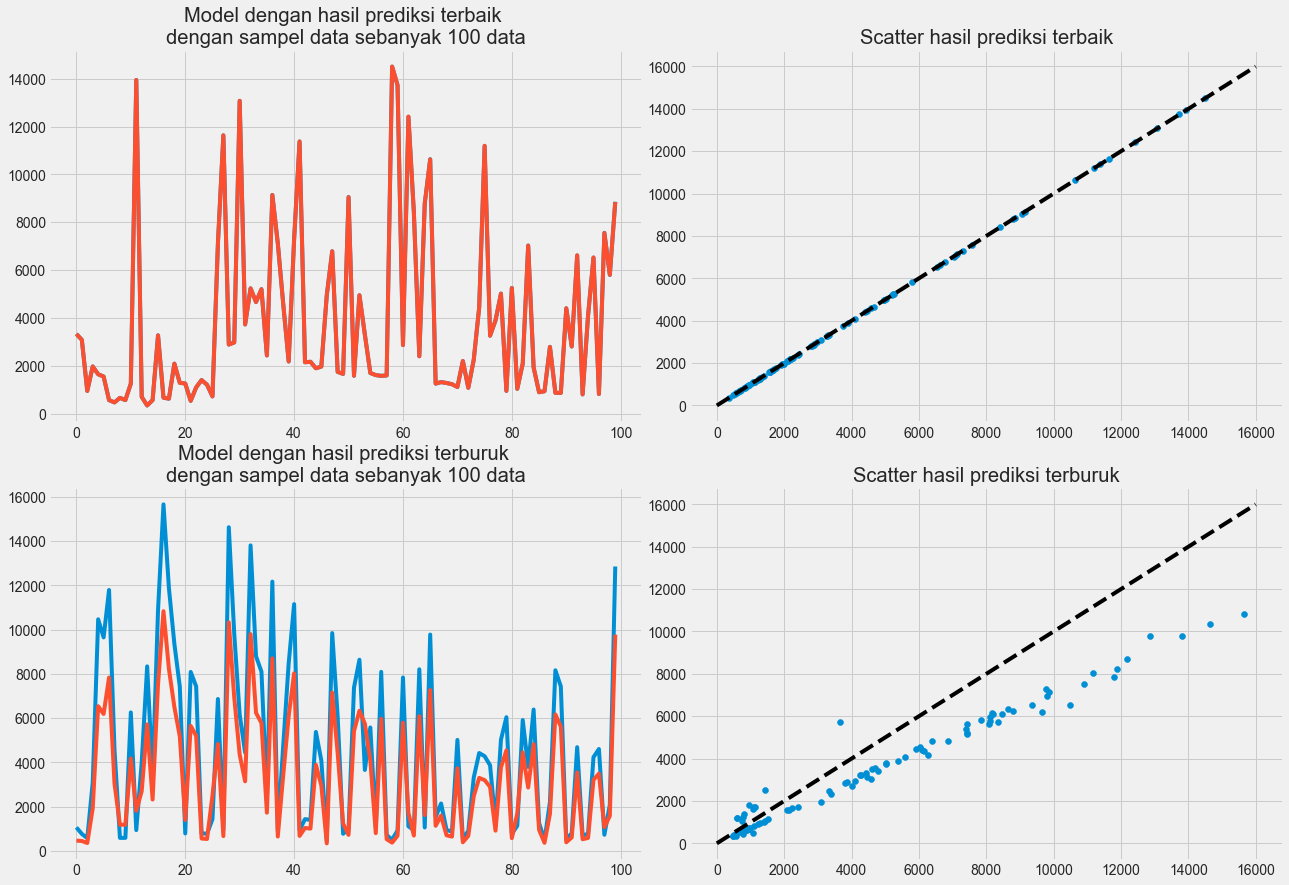

In [77]:
best_worst_comparison_plot(model3, xTest_nonOutliers, yTest_nonOutliers, jumlah_data=100)

### Train Model Tanpa Data Preprocessing

In [78]:
tf.random.set_seed(42)

model4 = model_arsitektur(model_name = 'Dense_noALR_OutliersNoScale')

model4.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mape', 'mse'])

In [79]:
history_real_df_nonscale_nonlr = model4.fit(xTrain_outliersnoscale,
                                            yTrain_Outliersnoscale,
                                            validation_data = (xTest_Outliersnoscale,
                                                               yTest_Outliersnoscale),
                                            validation_split=0.2, verbose=2,
                                            batch_size = 128,
                                            shuffle=True,
                                            epochs = 300,
                                            callbacks = [ save_best_model(model4.name)
                                                #,early_stopping
                                                    ])

Epoch 1/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_OutliersNoScale\assets
337/337 - 7s - loss: 1027.6312 - mape: 28.0727 - mse: 4691798.0000 - val_loss: 717.3864 - val_mape: 16.6516 - val_mse: 2017596.8750 - 7s/epoch - 20ms/step
Epoch 2/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_OutliersNoScale\assets
337/337 - 5s - loss: 684.9540 - mape: 16.8860 - mse: 2618628.0000 - val_loss: 707.8038 - val_mape: 16.1309 - val_mse: 1848977.3750 - 5s/epoch - 16ms/step
Epoch 3/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_OutliersNoScale\assets
337/337 - 6s - loss: 617.1957 - mape: 15.8619 - mse: 2284832.7500 - val_loss: 574.9773 - val_mape: 16.1999 - val_mse: 1273924.0000 - 6s/epoch - 17ms/step
Epoch 4/300
INFO:tensorflow:Assets written to: best_model_experimetns\Dense_noALR_OutliersNoScale\assets
337/337 - 8s - loss: 602.3586 - mape: 15.4737 - mse: 2131545.0000 - val_loss: 558.0806 - val_mape: 14.7883 - val_mse:

In [80]:
# plot hasil model
pd.DataFrame(history_real_df_nonscale_nonlr.history)[['loss', 'val_loss']].plot(figsize = (10,5))
plt.title("Model Tanpa Adaptive LR dan Tanpa Data Preprocessing")
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

In [81]:
pd.DataFrame(history_real_df_nonscale_nonlr.history)

loss       mape           mse    val_loss   val_mape       val_mse
0    1027.631226  28.072706  4.691798e+06  717.386353  16.651602  2.017597e+06
1     684.953979  16.885998  2.618628e+06  707.803772  16.130873  1.848977e+06
2     617.195679  15.861928  2.284833e+06  574.977295  16.199944  1.273924e+06
3     602.358582  15.473687  2.131545e+06  558.080627  14.788301  1.253798e+06
4     600.719421  15.441067  1.875450e+06  566.197937  14.657670  1.218223e+06
..           ...        ...           ...         ...        ...           ...
295   287.900726   7.864058  3.221398e+05  350.763916   9.128331  3.747222e+05
296   288.048462   7.881297  3.248880e+05  291.853394   8.207228  2.997991e+05
297   286.644226   7.841824  3.229489e+05  276.930176   7.917299  2.955026e+05
298   287.119202   7.868925  3.217872e+05  287.685089   8.252872  3.137513e+05
299   288.414825   7.898162  3.240752e+05  281.522522   7.877616  3.130386e+05

[300 rows x 6 columns]

In [82]:
model4 = tf.keras.models.load_model('best_model_experimetns\Dense_noALR_OutliersNoScale')

In [83]:
model4.evaluate(xTest_Outliersnoscale, yTest_Outliersnoscale)

337/337 [==============================] - 1s 2ms/step - loss: 274.2503 - mape: 7.8211 - mse: 297386.5625


[274.2502746582031, 7.821094512939453, 297386.5625]

In [84]:
prediksi_model4 = rekap_prediksi(model4, xTest_Outliersnoscale, yTest_Outliersnoscale)
prediksi_model4

337/337 [==============================] - 1s 2ms/step


prediksi   asli  selisih_absolut  perc_diff
0          1602   1435              167      11.64
1          3543   3584               41       1.14
2          1873   1851               22       1.19
3          1671   1590               81       5.09
4          5571   5690              119       2.09
...         ...    ...              ...        ...
10754      1276   1249               27       2.16
10755      1534   1428              106       7.42
10756       875    912               37       4.06
10757     15138  15002              136       0.91
10758      1046   1071               25       2.33

[10759 rows x 4 columns]

In [85]:
prediksi_model4.describe()

prediksi          asli  selisih_absolut     perc_diff
count  10759.000000  10759.000000     10759.000000  10759.000000
mean    3900.785389   3885.793568       274.255321      7.821478
std     3945.508066   3904.290849       471.374660      7.752277
min      314.000000    335.000000         0.000000      0.000000
25%      901.000000    952.500000        47.000000      2.420000
50%     2460.000000   2436.000000       121.000000      5.410000
75%     5245.500000   5246.500000       294.000000     10.695000
max    19790.000000  18791.000000      8371.000000    134.840000

In [86]:
model4_metrik = get_all_metrik(prediksi_model4.prediksi, prediksi_model4.asli)
model4_metrik

{'mae': 274.25532112649876,
 'mse': 297389.3996653964,
 'rmse': 545.3342091464614,
 'mape': 0.07821510820776101,
 'medAE': 121.0,
 'R2-Score': 0.9804889102727393,
 'Adjs-R2': 0.9804870964687301}

In [87]:
plot_n_data_with_scatter(prediksi_model4.prediksi, prediksi_model4.asli)

In [88]:
best_model4, worst_model4 = get_best_worst_prediction(model4, xTest_Outliersnoscale,
                                                      yTest_Outliersnoscale)
best_model4

337/337 [==============================] - 1s 1ms/step


prediksi   asli  selisih_absolut  perc_diff
0        3092   3092                0        0.0
1         572    572                0        0.0
2         388    388                0        0.0
3         702    702                0        0.0
4        1441   1441                0        0.0
..        ...    ...              ...        ...
245      2051   2047                4        0.2
246      2024   2028                4        0.2
247     17107  17073               34        0.2
248       490    489                1        0.2
249      2463   2458                5        0.2

[250 rows x 4 columns]

In [89]:
worst_model4

prediksi   asli  selisih_absolut  perc_diff
0        5002   2130             2872     134.84
1        5669   2845             2824      99.26
2        1381   9752             8371      85.84
3         544   2160             1616      74.81
4        3733   2180             1553      71.24
..        ...    ...              ...        ...
245      9097   7155             1942      27.14
246     16613  13069             3544      27.12
247       433    594              161      27.10
248      6857   5397             1460      27.05
249      6245   4916             1329      27.03

[250 rows x 4 columns]

337/337 [==============================] - 1s 2ms/step


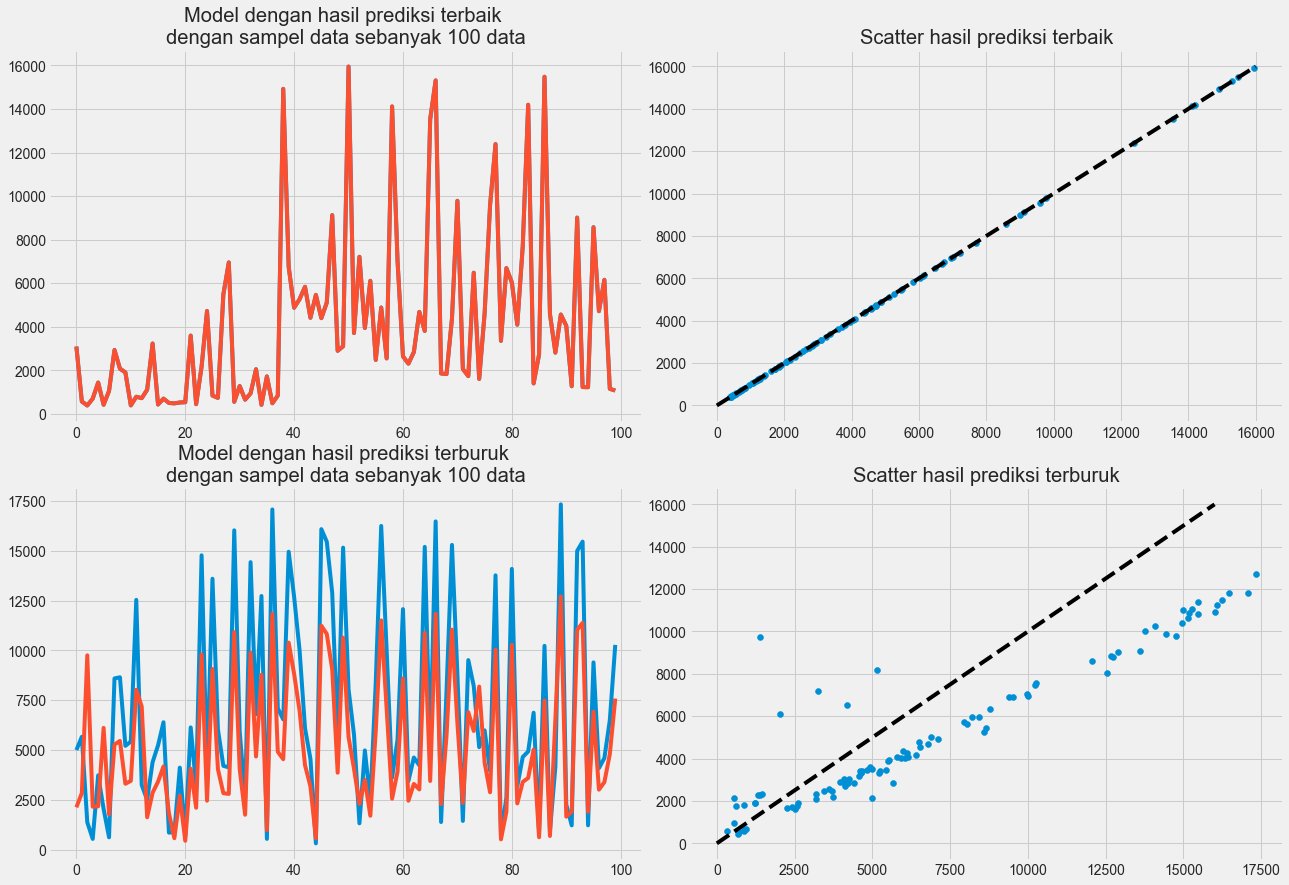

In [90]:
best_worst_comparison_plot(model4, xTest_Outliersnoscale, yTest_Outliersnoscale, jumlah_data=100)

### 1D Convolutional Neural Network

In [91]:
# Model CNN perlu sedikit perubahan untuk inputnya agar menyesuaikan yang diharapkan, untuk penjelasan dan hasil dari perubahan yang dilakukan ada di bawah
x_train1D = np.array(xTrain_nontOutliers)
y_train1D = yTrain_nonOutliers

x_train1D_noscale = np.array(xTrain_outliersnoscale)
y_train1D_noscale = yTrain_Outliersnoscale

x_test1D = np.array(xTest_nonOutliers)
y_test1D = yTest_nonOutliers

x_test1D_noscale = np.array(xTest_Outliersnoscale)
y_test1D_noscale = yTest_Outliersnoscale

x_train1D.shape, y_train1D.shape, x_train1D_noscale.shape, y_train1D_noscale.shape

((37775, 7), (37775,), (43035, 7), (43035,))

In [92]:
# Berikut adalah perubahan yang akan dilakukan pada input ketika dilakukan training, di bawah ini adalah hasil sebelum dan sesudah dari input ketika dimasukan pada Layer pertama model 1D CNN yang digunakan ( layer Lambda )

# contoh hasil perubahan
ubah = tf.expand_dims(np.array(xTrain_nontOutliers)[0], axis = 1)
print(f'Sebelum di ubah : \n {np.array(xTrain_nontOutliers)[0]} \n'
      f'Shape : {np.array(xTrain_nontOutliers)[0].shape} \n \n'
      f'Sesudah di ubah : \n {ubah} \n'
      f'Shape : {ubah.shape}' )

Sebelum di ubah : 
 [0.16993464 0.125      0.56730769 0.1676198  4.         0.
 2.        ] 
Shape : (7,) 
 
Sesudah di ubah : 
 [[0.16993464]
 [0.125     ]
 [0.56730769]
 [0.1676198 ]
 [4.        ]
 [0.        ]
 [2.        ]] 
Shape : (7, 1)


In [93]:
# alasan pake 3 kernel size
# https://medium.com/analytics-vidhya/how-to-choose-the-size-of-the-convolution-filter-or-kernel-size-for-cnn-86a55a1e2d15

def model1DCNN_arsitektur(nama_model):
    model1D = tf.keras.Sequential([

        tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis = 1)),
        tf.keras.layers.Conv1D(filters= 256, kernel_size= 3,
                               strides= 2, padding= 'same',
                               activation = 'relu'),
        tf.keras.layers.Conv1D(filters= 256, kernel_size= 3,
                               strides= 2, padding= 'same',
                               activation = 'relu'),
        tf.keras.layers.AvgPool1D(pool_size= 2, padding = 'same'),
        tf.keras.layers.Conv1D(filters= 256, kernel_size= 3,
                               strides= 2, padding= 'same',
                               activation = 'relu'),
        tf.keras.layers.Conv1D(filters= 256, kernel_size= 3,
                               strides= 2, padding= 'same',
                               activation = 'relu'),
        tf.keras.layers.AvgPool1D(pool_size= 3, padding = 'same'),
        tf.keras.layers.Conv1D(filters= 256, kernel_size= 3,
                               strides= 2, padding= 'same',
                               activation = 'relu'),
        tf.keras.layers.Conv1D(filters= 256, kernel_size= 3,
                               strides= 2, padding= 'same',
                               activation = 'relu'),
        tf.keras.layers.AvgPool1D(pool_size= 3, padding = 'same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1)

    ], name = nama_model)

    return model1D

In [94]:
tf.random.set_seed(42)

model1D = model1DCNN_arsitektur('Model1D')

def lr_scheduler(epoch, lr):
    if epoch < 30:
        return lr
    if lr < 1e-4:
        return 1e-4
    else:
        return lr * tf.math.exp(-0.1)

import os
def save_best_model(model_name, save_path = 'best_model_experimetns'):
    return tf.keras.callbacks.ModelCheckpoint(filepath= os.path.join(save_path, model_name),
                                               save_best_only= True)

lr_scheduler_riil = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

model1D.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['mape', 'mse'])

In [95]:
history_df_1D = model1D.fit(x_train1D,
                            y_train1D,
                            epochs = 300, verbose = 2,
                            batch_size = 128,
                            validation_data= (x_test1D, y_test1D),
                            callbacks = [lr_scheduler_riil,
                                         save_best_model(model_name= model1D.name)],
                            validation_split = 0.2,
                            shuffle = True)


Epoch 1/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 9s - loss: 1125.8724 - mape: 41.6440 - mse: 4370540.5000 - val_loss: 629.8008 - val_mape: 20.7511 - val_mse: 1136489.3750 - lr: 0.0010 - 9s/epoch - 31ms/step
Epoch 2/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 460.0364 - mape: 13.9583 - mse: 681107.2500 - val_loss: 500.8256 - val_mape: 14.3008 - val_mse: 790231.5000 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 3/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 413.2998 - mape: 12.6611 - mse: 540148.6250 - val_loss: 389.2639 - val_mape: 11.7986 - val_mse: 531269.0625 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 4/300
296/296 - 4s - loss: 393.2850 - mape: 12.3638 - mse: 470369.3125 - val_loss: 538.2823 - val_mape: 15.4922 - val_mse: 790185.7500 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 5/300
296/296 - 4s - loss: 372.9469 - mape: 11.8188 - mse: 427512.4062 - val_loss: 452.3154 - val_mape: 16.7813 - val_mse: 503796.3438 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 6/300
296/296 - 4s - loss: 348.2560 - mape: 11.1305 - mse: 368760.3125 - val_loss: 427.1290 - val_mape: 14.5348 - val_mse: 503714.8750 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 7/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 340.4706 - mape: 10.9468 - mse: 348126.8438 - val_loss: 320.9111 - val_mape: 10.4590 - val_mse: 319126.8438 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 8/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 332.3416 - mape: 10.7094 - mse: 333680.2500 - val_loss: 315.5248 - val_mape: 10.5620 - val_mse: 307302.7500 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 9/300
296/296 - 4s - loss: 327.1713 - mape: 10.5473 - mse: 319845.8438 - val_loss: 330.4433 - val_mape: 9.8950 - val_mse: 338881.5000 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 10/300
296/296 - 4s - loss: 322.7339 - mape: 10.4340 - mse: 311783.3125 - val_loss: 324.8914 - val_mape: 11.6763 - val_mse: 297861.9062 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 11/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 307.5639 - mape: 10.0028 - mse: 283340.1875 - val_loss: 311.5034 - val_mape: 10.7694 - val_mse: 277942.2188 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 12/300
296/296 - 4s - loss: 302.6126 - mape: 9.8481 - mse: 277445.0938 - val_loss: 318.5175 - val_mape: 10.3610 - val_mse: 313667.7188 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 13/300
296/296 - 4s - loss: 302.3268 - mape: 9.8320 - mse: 271803.3125 - val_loss: 367.9640 - val_mape: 13.9813 - val_mse: 335472.6562 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 14/300
296/296 - 4s - loss: 300.2841 - mape: 9.6890 - mse: 267730.0625 - val_loss: 400.4819 - val_mape: 13.3174 - val_mse: 399029.0312 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 15/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 6s - loss: 286.3080 - mape: 9.2569 - mse: 249321.1562 - val_loss: 275.6647 - val_mape: 9.0041 - val_mse: 237610.9844 - lr: 0.0010 - 6s/epoch - 22ms/step
Epoch 16/300
296/296 - 4s - loss: 285.2585 - mape: 9.1654 - mse: 249287.0312 - val_loss: 342.6399 - val_mape: 11.9626 - val_mse: 303046.8125 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 17/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 282.0179 - mape: 9.0312 - mse: 243356.8906 - val_loss: 274.5408 - val_mape: 9.2338 - val_mse: 231711.7500 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 18/300
296/296 - 4s - loss: 280.3595 - mape: 8.9618 - mse: 241235.9688 - val_loss: 373.4502 - val_mape: 13.6353 - val_mse: 335589.6250 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 19/300
296/296 - 4s - loss: 274.9168 - mape: 8.8565 - mse: 233984.5625 - val_loss: 387.8692 - val_mape: 12.0540 - val_mse: 427354.4375 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 20/300
296/296 - 4s - loss: 284.9767 - mape: 9.1059 - mse: 245783.1562 - val_loss: 401.5086 - val_mape: 14.0683 - val_mse: 396416.7188 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 21/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 275.4745 - mape: 8.8736 - mse: 232781.8906 - val_loss: 266.5386 - val_mape: 8.4857 - val_mse: 216717.8125 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 22/300
296/296 - 5s - loss: 268.6410 - mape: 8.6340 - mse: 222693.7969 - val_loss: 288.5671 - val_mape: 9.4272 - val_mse: 251112.5469 - lr: 0.0010 - 5s/epoch - 18ms/step
Epoch 23/300
296/296 - 5s - loss: 270.3462 - mape: 8.6900 - mse: 226969.3750 - val_loss: 282.3849 - val_mape: 9.3795 - val_mse: 238029.3125 - lr: 0.0010 - 5s/epoch - 18ms/step
Epoch 24/300
296/296 - 5s - loss: 265.4710 - mape: 8.5780 - mse: 218997.5625 - val_loss: 298.3687 - val_mape: 9.8205 - val_mse: 259323.9844 - lr: 0.0010 - 5s/epoch - 18ms/step
Epoch 25/300
296/296 - 5s - loss: 270.7499 - mape: 8.7442 - mse: 224160.2812 - val_loss: 361.4918 - val_mape: 13.6703 - val_mse: 306121.2188 - lr: 0.0010 - 5s/epoch - 17ms/step
Epoch 26/300
296/296 - 5s - loss: 265.5317 - mape: 8.5975 - mse: 213450.9844 - val_loss: 293.3058 - val_mape: 9.9157 - val_mse: 2555

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 267.5938 - mape: 8.6486 - mse: 214347.0625 - val_loss: 263.9815 - val_mape: 8.3075 - val_mse: 210426.6250 - lr: 0.0010 - 7s/epoch - 24ms/step
Epoch 30/300
296/296 - 4s - loss: 256.8342 - mape: 8.3372 - mse: 202649.3906 - val_loss: 293.1306 - val_mape: 9.5435 - val_mse: 269061.2500 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 31/300
296/296 - 4s - loss: 257.6129 - mape: 8.3856 - mse: 200310.4062 - val_loss: 282.7064 - val_mape: 10.3797 - val_mse: 223078.0938 - lr: 9.0484e-04 - 4s/epoch - 13ms/step
Epoch 32/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 253.5784 - mape: 8.2444 - mse: 197729.5156 - val_loss: 248.4110 - val_mape: 8.5428 - val_mse: 197153.6875 - lr: 8.1873e-04 - 7s/epoch - 24ms/step
Epoch 33/300
296/296 - 4s - loss: 245.5758 - mape: 7.9870 - mse: 187186.6562 - val_loss: 289.7265 - val_mape: 9.9342 - val_mse: 247021.0312 - lr: 7.4082e-04 - 4s/epoch - 13ms/step
Epoch 34/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 241.8530 - mape: 7.8718 - mse: 184870.2656 - val_loss: 234.5655 - val_mape: 7.7070 - val_mse: 176384.3281 - lr: 6.7032e-04 - 7s/epoch - 24ms/step
Epoch 35/300
296/296 - 4s - loss: 239.6864 - mape: 7.8646 - mse: 179775.7188 - val_loss: 245.6933 - val_mape: 8.5500 - val_mse: 191477.7969 - lr: 6.0653e-04 - 4s/epoch - 13ms/step
Epoch 36/300
296/296 - 4s - loss: 241.0644 - mape: 7.8561 - mse: 182400.5781 - val_loss: 271.1297 - val_mape: 9.5798 - val_mse: 222042.1250 - lr: 5.4881e-04 - 4s/epoch - 13ms/step
Epoch 37/300
296/296 - 4s - loss: 236.2912 - mape: 7.6896 - mse: 176562.2031 - val_loss: 235.5482 - val_mape: 7.7003 - val_mse: 173393.5625 - lr: 4.9659e-04 - 4s/epoch - 13ms/step
Epoch 38/300
296/296 - 4s - loss: 236.3568 - mape: 7.7152 - mse: 177514.0625 - val_loss: 282.0862 - val_mape: 9.3582 - val_mse: 240611.4219 - lr: 4.4933e-04 - 4s/epoch - 13ms/step
Epoch 39/300
296/296 - 4s - loss: 234.7583 - mape: 7.6610 - mse: 174537.0156 - val_loss: 338.8748 - val_mape: 11.

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 236.4481 - mape: 7.7341 - mse: 179300.7031 - val_loss: 233.1756 - val_mape: 7.5185 - val_mse: 174009.5469 - lr: 3.6788e-04 - 7s/epoch - 24ms/step
Epoch 41/300
296/296 - 4s - loss: 228.2773 - mape: 7.4368 - mse: 168712.0625 - val_loss: 241.3641 - val_mape: 8.1231 - val_mse: 183448.7969 - lr: 3.3287e-04 - 4s/epoch - 13ms/step
Epoch 42/300
296/296 - 4s - loss: 227.8845 - mape: 7.4547 - mse: 167186.9531 - val_loss: 236.5782 - val_mape: 7.6684 - val_mse: 177474.5781 - lr: 3.0119e-04 - 4s/epoch - 13ms/step
Epoch 43/300
296/296 - 4s - loss: 232.6884 - mape: 7.5919 - mse: 172676.2500 - val_loss: 236.3638 - val_mape: 7.9229 - val_mse: 176898.1875 - lr: 2.7253e-04 - 4s/epoch - 13ms/step
Epoch 44/300
296/296 - 4s - loss: 227.5384 - mape: 7.4234 - mse: 167402.4688 - val_loss: 235.6491 - val_mape: 7.9391 - val_mse: 177219.3750 - lr: 2.4660e-04 - 4s/epoch - 13ms/step
Epoch 45/300
296/296 - 4s - loss: 225.8762 - mape: 7.3542 - mse: 166566.7500 - val_loss: 250.7574 - val_mape: 8.5

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 225.8781 - mape: 7.3678 - mse: 166225.2969 - val_loss: 228.6326 - val_mape: 7.4754 - val_mse: 170249.2500 - lr: 2.0190e-04 - 7s/epoch - 24ms/step
Epoch 47/300
296/296 - 4s - loss: 222.8921 - mape: 7.2792 - mse: 162912.1719 - val_loss: 232.9994 - val_mape: 7.7607 - val_mse: 174859.7500 - lr: 1.8268e-04 - 4s/epoch - 13ms/step
Epoch 48/300
296/296 - 4s - loss: 222.8425 - mape: 7.2651 - mse: 162969.8281 - val_loss: 247.9120 - val_mape: 8.5506 - val_mse: 186997.4062 - lr: 1.6530e-04 - 4s/epoch - 13ms/step
Epoch 49/300


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 9s - loss: 222.5420 - mape: 7.2614 - mse: 163305.3438 - val_loss: 227.3748 - val_mape: 7.6203 - val_mse: 168089.4688 - lr: 1.4957e-04 - 9s/epoch - 29ms/step
Epoch 50/300
296/296 - 5s - loss: 222.0921 - mape: 7.2526 - mse: 162133.8906 - val_loss: 230.1983 - val_mape: 7.7648 - val_mse: 171129.1094 - lr: 1.3534e-04 - 5s/epoch - 18ms/step
Epoch 51/300
296/296 - 5s - loss: 221.9556 - mape: 7.2370 - mse: 162798.4375 - val_loss: 248.7153 - val_mape: 8.3821 - val_mse: 202539.3750 - lr: 1.2246e-04 - 5s/epoch - 17ms/step
Epoch 52/300
296/296 - 5s - loss: 220.6535 - mape: 7.2018 - mse: 161295.0625 - val_loss: 234.3481 - val_mape: 8.0109 - val_mse: 174745.9062 - lr: 1.1080e-04 - 5s/epoch - 16ms/step
Epoch 53/300
296/296 - 4s - loss: 219.8058 - mape: 7.1790 - mse: 159953.9844 - val_loss: 232.9659 - val_mape: 7.8469 - val_mse: 176549.7031 - lr: 1.0026e-04 - 4s/epoch - 14ms/step
Epoch 54/300
296/296 - 5s - loss: 220.2167 - mape: 7.1793 - mse: 161061.5938 - val_loss: 229.8676 - val_mape: 7.7

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 219.1310 - mape: 7.1487 - mse: 159486.0469 - val_loss: 226.8995 - val_mape: 7.4669 - val_mse: 166840.0156 - lr: 1.0000e-04 - 7s/epoch - 25ms/step
Epoch 62/300
296/296 - 4s - loss: 219.5456 - mape: 7.1640 - mse: 160200.1406 - val_loss: 227.9786 - val_mape: 7.6247 - val_mse: 166857.1562 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 63/300
296/296 - 4s - loss: 219.0796 - mape: 7.1432 - mse: 158911.2969 - val_loss: 236.2116 - val_mape: 8.1027 - val_mse: 181907.2031 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 64/300
296/296 - 4s - loss: 218.6731 - mape: 7.1328 - mse: 159773.3438 - val_loss: 229.4070 - val_mape: 7.8053 - val_mse: 166176.6562 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 65/300
296/296 - 4s - loss: 220.0492 - mape: 7.1900 - mse: 159994.4219 - val_loss: 239.2049 - val_mape: 8.1062 - val_mse: 184887.1562 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 66/300
296/296 - 4s - loss: 219.8473 - mape: 7.1741 - mse: 160063.5781 - val_loss: 229.2289 - val_mape: 7.6

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 8s - loss: 218.1625 - mape: 7.1163 - mse: 159476.0000 - val_loss: 226.5259 - val_mape: 7.4776 - val_mse: 167707.1719 - lr: 1.0000e-04 - 8s/epoch - 26ms/step
Epoch 77/300
296/296 - 4s - loss: 217.6610 - mape: 7.1043 - mse: 158857.8281 - val_loss: 226.9433 - val_mape: 7.5047 - val_mse: 166667.6875 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 78/300
296/296 - 4s - loss: 218.1585 - mape: 7.1329 - mse: 158531.9688 - val_loss: 235.1877 - val_mape: 7.9025 - val_mse: 179462.0781 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 79/300
296/296 - 4s - loss: 218.2963 - mape: 7.1206 - mse: 158836.7188 - val_loss: 231.1046 - val_mape: 7.7890 - val_mse: 175125.2344 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 80/300
296/296 - 4s - loss: 217.6234 - mape: 7.1022 - mse: 158068.1250 - val_loss: 227.5679 - val_mape: 7.5928 - val_mse: 168252.7812 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 81/300
296/296 - 4s - loss: 217.3266 - mape: 7.0974 - mse: 158181.2500 - val_loss: 227.6787 - val_mape: 7.7

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 217.4364 - mape: 7.0840 - mse: 158354.2031 - val_loss: 224.9176 - val_mape: 7.4281 - val_mse: 166127.6875 - lr: 1.0000e-04 - 7s/epoch - 25ms/step
Epoch 104/300
296/296 - 4s - loss: 215.9474 - mape: 7.0559 - mse: 156807.7344 - val_loss: 253.1396 - val_mape: 8.5201 - val_mse: 204135.6719 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 105/300
296/296 - 4s - loss: 216.4333 - mape: 7.0628 - mse: 158079.6250 - val_loss: 227.6050 - val_mape: 7.6433 - val_mse: 166926.7656 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 106/300
296/296 - 4s - loss: 216.2420 - mape: 7.0568 - mse: 157159.7344 - val_loss: 225.9051 - val_mape: 7.4681 - val_mse: 167714.5938 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 107/300
296/296 - 4s - loss: 215.6062 - mape: 7.0358 - mse: 156499.5156 - val_loss: 236.9861 - val_mape: 8.0340 - val_mse: 179630.0469 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 108/300
296/296 - 4s - loss: 217.0577 - mape: 7.0654 - mse: 158414.9062 - val_loss: 226.8235 - val_mape

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 7s - loss: 214.7665 - mape: 6.9997 - mse: 155519.4688 - val_loss: 224.4999 - val_mape: 7.3543 - val_mse: 164875.6406 - lr: 1.0000e-04 - 7s/epoch - 23ms/step
Epoch 128/300
296/296 - 4s - loss: 214.4391 - mape: 7.0027 - mse: 155835.3750 - val_loss: 226.4291 - val_mape: 7.4577 - val_mse: 169573.9062 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 129/300
296/296 - 4s - loss: 214.8701 - mape: 7.0080 - mse: 155484.9062 - val_loss: 234.0624 - val_mape: 7.8209 - val_mse: 179153.6406 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 130/300
296/296 - 4s - loss: 214.4386 - mape: 6.9855 - mse: 155263.7344 - val_loss: 245.3445 - val_mape: 8.3303 - val_mse: 193538.9062 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 131/300
296/296 - 4s - loss: 214.7447 - mape: 7.0041 - mse: 155678.3906 - val_loss: 228.9045 - val_mape: 7.8039 - val_mse: 168194.9062 - lr: 1.0000e-04 - 4s/epoch - 13ms/step
Epoch 132/300
296/296 - 4s - loss: 215.0530 - mape: 7.0104 - mse: 155640.4062 - val_loss: 234.8125 - val_mape

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 8s - loss: 208.8256 - mape: 6.8110 - mse: 150014.5000 - val_loss: 224.2491 - val_mape: 7.3968 - val_mse: 165012.7500 - lr: 1.0000e-04 - 8s/epoch - 25ms/step
Epoch 262/300
296/296 - 4s - loss: 210.0762 - mape: 6.8483 - mse: 151483.1250 - val_loss: 226.6037 - val_mape: 7.6162 - val_mse: 167512.6875 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 263/300
296/296 - 4s - loss: 209.0411 - mape: 6.8192 - mse: 150428.2031 - val_loss: 225.2552 - val_mape: 7.4474 - val_mse: 167565.4688 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 264/300
296/296 - 4s - loss: 207.9530 - mape: 6.8031 - mse: 148716.2188 - val_loss: 228.4854 - val_mape: 7.4852 - val_mse: 166985.7812 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 265/300
296/296 - 4s - loss: 209.2269 - mape: 6.8284 - mse: 150489.7656 - val_loss: 225.0410 - val_mape: 7.4243 - val_mse: 166223.1875 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 266/300
296/296 - 4s - loss: 208.6617 - mape: 6.8065 - mse: 149060.6719 - val_loss: 225.2249 - val_mape

INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


INFO:tensorflow:Assets written to: best_model_experimetns\Model1D\assets


296/296 - 8s - loss: 207.9670 - mape: 6.7804 - mse: 149063.1250 - val_loss: 223.9262 - val_mape: 7.3790 - val_mse: 164911.9062 - lr: 1.0000e-04 - 8s/epoch - 26ms/step
Epoch 279/300
296/296 - 4s - loss: 208.8479 - mape: 6.8393 - mse: 149801.1406 - val_loss: 229.1143 - val_mape: 7.8174 - val_mse: 167688.4375 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 280/300
296/296 - 4s - loss: 208.3790 - mape: 6.7957 - mse: 149149.5625 - val_loss: 232.6496 - val_mape: 8.0931 - val_mse: 171626.6094 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 281/300
296/296 - 4s - loss: 207.6982 - mape: 6.7804 - mse: 149704.6562 - val_loss: 229.1089 - val_mape: 7.7904 - val_mse: 171322.2500 - lr: 1.0000e-04 - 4s/epoch - 15ms/step
Epoch 282/300
296/296 - 4s - loss: 209.8789 - mape: 6.8469 - mse: 150237.5625 - val_loss: 232.3264 - val_mape: 7.9945 - val_mse: 172240.6719 - lr: 1.0000e-04 - 4s/epoch - 14ms/step
Epoch 283/300
296/296 - 4s - loss: 208.3720 - mape: 6.8132 - mse: 148670.0938 - val_loss: 230.0165 - val_mape

In [96]:
model1D.summary()

Model: "Model1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            5632      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            196864    
                                                                 
 average_pooling1d (AverageP  (None, 1, 256)           0         
 ooling1D)                                                       
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 256)            196864    
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 256)            196864    
                                                           

In [97]:
model1D = tf.keras.models.load_model('best_model_experimetns\Model1D')

Text(0.5, 0, 'Epoch')

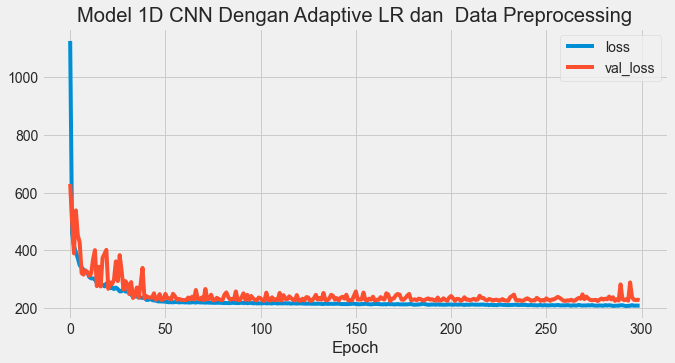

In [98]:
pd.DataFrame(history_df_1D.history)[['loss','val_loss']].plot(figsize = (10,5))
plt.title("Model 1D CNN Dengan Adaptive LR dan  Data Preprocessing")
plt.xlabel('Epoch')

In [99]:
model1D.evaluate(x_test1D, y_test1D)

296/296 [==============================] - 1s 4ms/step - loss: 223.9261 - mape: 7.3790 - mse: 164912.0000


[223.9261474609375, 7.378969192504883, 164912.0]

In [100]:
prediksi_model1D = rekap_prediksi(model1D, x_test1D, y_test1D)
prediksi_model1D

296/296 [==============================] - 1s 3ms/step


prediksi   asli  selisih_absolut  perc_diff
0          790    792                2       0.25
1         4709   4707                2       0.04
2         2528   2593               65       2.51
3         4140   4443              303       6.82
4          846    734              112      15.26
...        ...    ...              ...        ...
9439      1709   1708                1       0.06
9440      9167   9419              252       2.68
9441       429    436                7       1.61
9442      3392   4101              709      17.29
9443     13483  15497             2014      13.00

[9444 rows x 4 columns]

In [101]:
prediksi_model1D.describe()

prediksi          asli  selisih_absolut    perc_diff
count   9444.000000   9444.000000      9444.000000  9444.000000
mean    3427.403748   3426.227975       223.924185     7.378659
std     3132.957771   3148.496888       338.786592     7.153892
min      334.000000    335.000000         0.000000     0.000000
25%      935.000000    957.000000        43.000000     2.327500
50%     2310.500000   2282.000000       112.000000     5.140000
75%     4869.250000   4872.000000       251.000000    10.232500
max    17638.000000  16492.000000      4661.000000   127.990000

In [102]:
model1D_metrik = get_all_metrik(prediksi_model1D.prediksi, prediksi_model1D.asli)
model1D_metrik

{'mae': 223.92418466751377,
 'mse': 164906.2422702245,
 'rmse': 406.08649604514613,
 'mape': 0.07378645132850982,
 'medAE': 112.0,
 'R2-Score': 0.9833629413538385,
 'Adjs-R2': 0.983361179326869}

In [103]:
plot_n_data_with_scatter(prediksi_model1D.prediksi, prediksi_model1D.asli)

In [104]:
best_model1D, worst_model1D = get_best_worst_prediction(model1D, x_test1D, y_test1D)
best_model1D

296/296 [==============================] - 1s 4ms/step


prediksi  asli  selisih_absolut  perc_diff
0        5019  5019                0       0.00
1        4981  4981                0       0.00
2        2048  2048                0       0.00
3         912   912                0       0.00
4         473   473                0       0.00
..        ...   ...              ...        ...
245      3984  3975                9       0.23
246       884   886                2       0.23
247       888   886                2       0.23
248      2036  2041                5       0.24
249      2557  2551                6       0.24

[250 rows x 4 columns]

In [105]:
worst_model1D

prediksi  asli  selisih_absolut  perc_diff
0        1067   468              599     127.99
1       10072  6543             3529      53.94
2       11988  7840             4148      52.91
3        6380  4179             2201      52.67
4         914  1818              904      49.72
..        ...   ...              ...        ...
245       582   462              120      25.97
246       714   567              147      25.93
247      5126  4071             1055      25.92
248       592   799              207      25.91
249     10031  7968             2063      25.89

[250 rows x 4 columns]

296/296 [==============================] - 1s 3ms/step


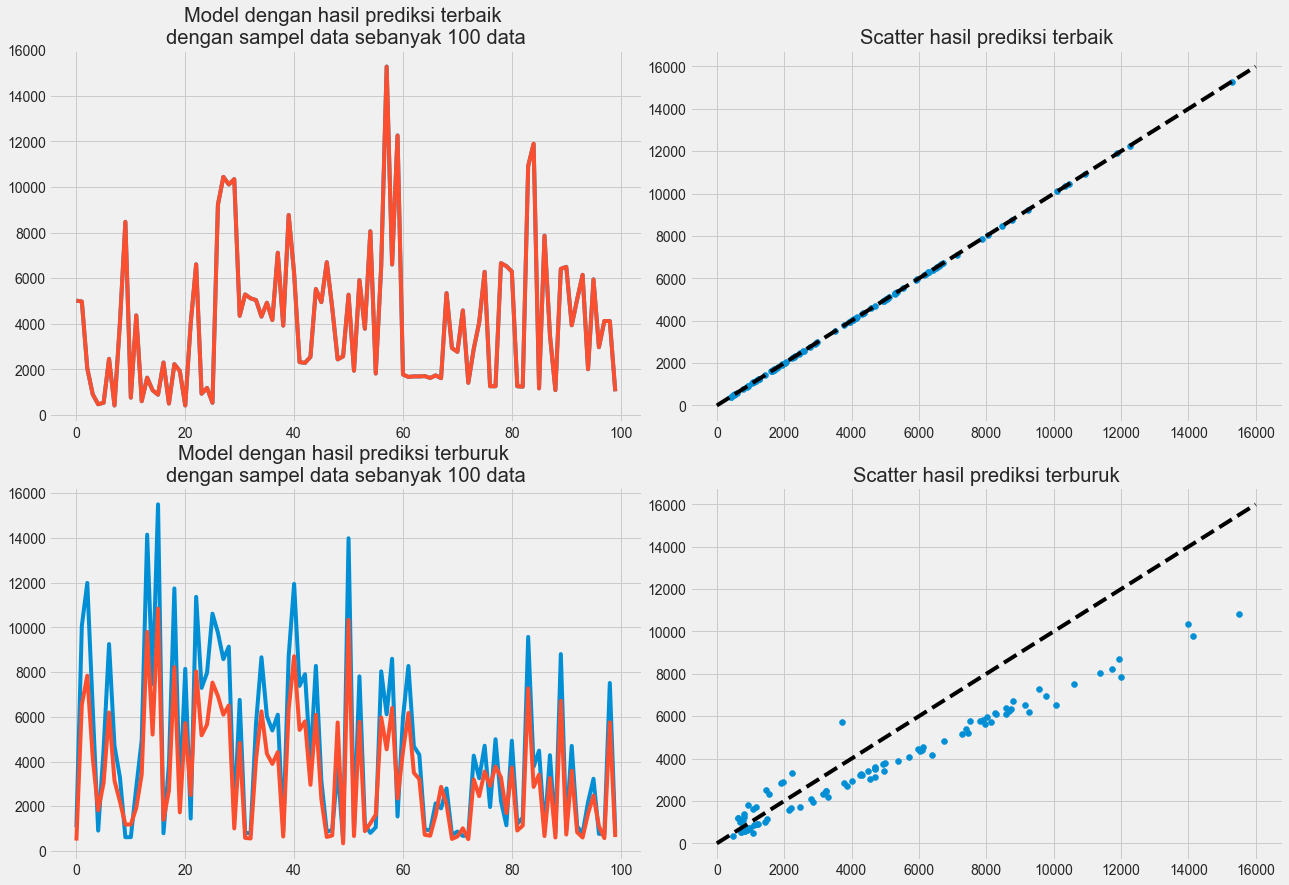

In [106]:
best_worst_comparison_plot(model1D, x_test1D, y_test1D, jumlah_data=100)

#### 1D CNN without ALR without scale dataset

In [107]:
tf.random.set_seed(42)

model1D_noALRnoScale = model1DCNN_arsitektur('model1D_noALRnoScale')

model1D_noALRnoScale.compile(loss = tf.keras.losses.mean_absolute_error,
                     optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                     metrics = ['mape', 'mse'])

In [108]:
history_df_1D_noscale = model1D_noALRnoScale.fit(x_train1D_noscale,
                            y_train1D_noscale,
                            epochs = 300, verbose = 2,
                            batch_size = 128,
                            validation_data= (x_test1D_noscale, y_test1D_noscale),
                            callbacks = [save_best_model(model_name= model1D_noALRnoScale.name)],
                            validation_split = 0.2,
                            shuffle = True)


Epoch 1/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 11s - loss: 1029.3335 - mape: 27.8813 - mse: 4712431.0000 - val_loss: 672.8578 - val_mape: 16.3395 - val_mse: 1822270.6250 - 11s/epoch - 33ms/step
Epoch 2/300
337/337 - 5s - loss: 670.2315 - mape: 16.9321 - mse: 2787290.7500 - val_loss: 827.6108 - val_mape: 17.5611 - val_mse: 2436671.5000 - 5s/epoch - 16ms/step
Epoch 3/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 620.8906 - mape: 15.9900 - mse: 2362133.0000 - val_loss: 604.9975 - val_mape: 17.9091 - val_mse: 1376397.0000 - 9s/epoch - 26ms/step
Epoch 4/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 611.3127 - mape: 15.7992 - mse: 2243761.2500 - val_loss: 583.0832 - val_mape: 15.9063 - val_mse: 1387826.1250 - 9s/epoch - 27ms/step
Epoch 5/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 614.7404 - mape: 15.8298 - mse: 1945121.0000 - val_loss: 561.4152 - val_mape: 14.6098 - val_mse: 1190900.2500 - 9s/epoch - 27ms/step
Epoch 6/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 598.9727 - mape: 15.3772 - mse: 1697983.8750 - val_loss: 548.4744 - val_mape: 14.2556 - val_mse: 1126550.6250 - 9s/epoch - 26ms/step
Epoch 7/300
337/337 - 5s - loss: 598.1267 - mape: 15.3561 - mse: 1547218.0000 - val_loss: 599.2443 - val_mape: 14.6135 - val_mse: 1309079.2500 - 5s/epoch - 15ms/step
Epoch 8/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 589.1346 - mape: 15.1437 - mse: 1459676.8750 - val_loss: 535.9124 - val_mape: 13.7385 - val_mse: 1067074.0000 - 9s/epoch - 26ms/step
Epoch 9/300
337/337 - 5s - loss: 571.9520 - mape: 14.5738 - mse: 1319376.5000 - val_loss: 589.7136 - val_mape: 17.6079 - val_mse: 1211029.2500 - 5s/epoch - 15ms/step
Epoch 10/300
337/337 - 5s - loss: 563.8478 - mape: 14.5749 - mse: 1246695.2500 - val_loss: 609.5923 - val_mape: 14.5710 - val_mse: 1298903.2500 - 5s/epoch - 15ms/step
Epoch 11/300
337/337 - 5s - loss: 562.9574 - mape: 14.3733 - mse: 1215001.5000 - val_loss: 572.8648 - val_mape: 16.6995 - val_mse: 1127641.6250 - 5s/epoch - 15ms/step
Epoch 12/300
337/337 - 5s - loss: 549.3207 - mape: 14.0281 - mse: 1144384.7500 - val_loss: 562.2350 - val_mape: 13.4289 - val_mse: 1139666.1250 - 5s/epoch - 15ms/step
Epoch 13/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 535.9144 - mape: 13.7495 - mse: 1096294.6250 - val_loss: 487.8223 - val_mape: 12.7782 - val_mse: 902468.1875 - 8s/epoch - 25ms/step
Epoch 14/300
337/337 - 5s - loss: 535.4595 - mape: 13.8433 - mse: 1085133.0000 - val_loss: 501.5733 - val_mape: 13.5628 - val_mse: 972997.8750 - 5s/epoch - 15ms/step
Epoch 15/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 524.3902 - mape: 13.6424 - mse: 1070331.7500 - val_loss: 486.9608 - val_mape: 13.5513 - val_mse: 905719.9375 - 8s/epoch - 25ms/step
Epoch 16/300
337/337 - 5s - loss: 509.4626 - mape: 13.3278 - mse: 1036419.7500 - val_loss: 524.0613 - val_mape: 13.1170 - val_mse: 970982.0625 - 5s/epoch - 14ms/step
Epoch 17/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 487.5828 - mape: 12.6101 - mse: 960962.6250 - val_loss: 411.8393 - val_mape: 11.1808 - val_mse: 657060.8750 - 8s/epoch - 22ms/step
Epoch 18/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 467.0035 - mape: 12.1941 - mse: 863930.1250 - val_loss: 405.8216 - val_mape: 11.0436 - val_mse: 624152.4375 - 9s/epoch - 26ms/step
Epoch 19/300
337/337 - 5s - loss: 426.5413 - mape: 11.3551 - mse: 715400.7500 - val_loss: 455.3170 - val_mape: 11.6586 - val_mse: 700078.9375 - 5s/epoch - 16ms/step
Epoch 20/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 9s - loss: 424.7698 - mape: 11.4012 - mse: 677896.9375 - val_loss: 375.7198 - val_mape: 10.3226 - val_mse: 547059.8750 - 9s/epoch - 27ms/step
Epoch 21/300
337/337 - 5s - loss: 409.7667 - mape: 11.0044 - mse: 664841.3750 - val_loss: 387.9163 - val_mape: 10.9283 - val_mse: 536958.3125 - 5s/epoch - 16ms/step
Epoch 22/300
337/337 - 5s - loss: 405.1445 - mape: 10.9001 - mse: 610479.2500 - val_loss: 393.6528 - val_mape: 12.0827 - val_mse: 541504.5000 - 5s/epoch - 14ms/step
Epoch 23/300
337/337 - 4s - loss: 392.4753 - mape: 10.7319 - mse: 569155.0625 - val_loss: 392.1352 - val_mape: 11.1516 - val_mse: 562717.6250 - 4s/epoch - 13ms/step
Epoch 24/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 404.1270 - mape: 11.0161 - mse: 602045.1875 - val_loss: 363.7183 - val_mape: 10.4527 - val_mse: 497530.2188 - 8s/epoch - 23ms/step
Epoch 25/300
337/337 - 4s - loss: 395.2829 - mape: 10.7663 - mse: 569986.1875 - val_loss: 435.3014 - val_mape: 11.3224 - val_mse: 646008.9375 - 4s/epoch - 13ms/step
Epoch 26/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 385.6406 - mape: 10.5655 - mse: 548803.6250 - val_loss: 351.0602 - val_mape: 9.7955 - val_mse: 429109.8125 - 8s/epoch - 23ms/step
Epoch 27/300
337/337 - 4s - loss: 379.6262 - mape: 10.4103 - mse: 517432.8125 - val_loss: 357.1436 - val_mape: 10.4539 - val_mse: 501375.0938 - 4s/epoch - 13ms/step
Epoch 28/300
337/337 - 4s - loss: 378.4607 - mape: 10.4483 - mse: 516305.0625 - val_loss: 428.4297 - val_mape: 11.2370 - val_mse: 679620.9375 - 4s/epoch - 13ms/step
Epoch 29/300
337/337 - 4s - loss: 374.8293 - mape: 10.3135 - mse: 506577.5000 - val_loss: 426.1812 - val_mape: 10.8680 - val_mse: 592463.6250 - 4s/epoch - 13ms/step
Epoch 30/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 7s - loss: 371.2798 - mape: 10.2433 - mse: 498233.5000 - val_loss: 349.7915 - val_mape: 9.8940 - val_mse: 450645.0312 - 7s/epoch - 21ms/step
Epoch 31/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 378.5052 - mape: 10.4512 - mse: 514783.8125 - val_loss: 336.6830 - val_mape: 9.5815 - val_mse: 408519.9375 - 8s/epoch - 23ms/step
Epoch 32/300
337/337 - 4s - loss: 370.5426 - mape: 10.2407 - mse: 489448.6250 - val_loss: 374.9218 - val_mape: 10.6601 - val_mse: 502943.9375 - 4s/epoch - 13ms/step
Epoch 33/300
337/337 - 4s - loss: 367.2793 - mape: 10.2167 - mse: 485926.3125 - val_loss: 347.4510 - val_mape: 9.7680 - val_mse: 414653.8438 - 4s/epoch - 13ms/step
Epoch 34/300
337/337 - 4s - loss: 359.1288 - mape: 9.9763 - mse: 471694.1250 - val_loss: 360.0094 - val_mape: 9.8131 - val_mse: 465543.4375 - 4s/epoch - 13ms/step
Epoch 35/300
337/337 - 4s - loss: 359.9612 - mape: 10.0164 - mse: 461818.1562 - val_loss: 375.0079 - val_mape: 9.7376 - val_mse: 483421.3125 - 4s/epoch - 13ms/step
Epoch 36/300
337/337 - 4s - loss: 360.4492 - mape: 10.0180 - mse: 470945.8125 - val_loss: 354.0570 - val_mape: 9.5280 - val_mse: 439176.6562 - 4s/epoch - 13ms/step
Epoch 37/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 361.3381 - mape: 10.0503 - mse: 469576.7188 - val_loss: 330.8917 - val_mape: 9.5081 - val_mse: 398635.1250 - 8s/epoch - 23ms/step
Epoch 38/300
337/337 - 4s - loss: 355.4729 - mape: 9.7988 - mse: 458722.7188 - val_loss: 337.9482 - val_mape: 10.3352 - val_mse: 398441.6250 - 4s/epoch - 13ms/step
Epoch 39/300
337/337 - 4s - loss: 360.6371 - mape: 9.9703 - mse: 475424.1875 - val_loss: 368.7506 - val_mape: 10.6405 - val_mse: 430087.9062 - 4s/epoch - 13ms/step
Epoch 40/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 357.5230 - mape: 9.8851 - mse: 460224.1250 - val_loss: 322.1232 - val_mape: 9.4687 - val_mse: 389856.8438 - 8s/epoch - 23ms/step
Epoch 41/300
337/337 - 4s - loss: 361.7526 - mape: 9.9021 - mse: 478641.5000 - val_loss: 341.1187 - val_mape: 9.7903 - val_mse: 450840.7188 - 4s/epoch - 13ms/step
Epoch 42/300
337/337 - 4s - loss: 352.8537 - mape: 9.7732 - mse: 450238.3438 - val_loss: 335.6190 - val_mape: 9.4510 - val_mse: 398516.4688 - 4s/epoch - 13ms/step
Epoch 43/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 338.8323 - mape: 9.4476 - mse: 418424.0312 - val_loss: 311.1520 - val_mape: 8.9481 - val_mse: 358802.2812 - 8s/epoch - 23ms/step
Epoch 44/300
337/337 - 4s - loss: 345.2163 - mape: 9.5753 - mse: 432648.2812 - val_loss: 356.2242 - val_mape: 9.4733 - val_mse: 457223.4688 - 4s/epoch - 13ms/step
Epoch 45/300
337/337 - 4s - loss: 351.1769 - mape: 9.6907 - mse: 448372.5625 - val_loss: 372.9939 - val_mape: 9.8780 - val_mse: 449691.6250 - 4s/epoch - 13ms/step
Epoch 46/300
337/337 - 4s - loss: 341.5244 - mape: 9.4985 - mse: 420487.0312 - val_loss: 346.8831 - val_mape: 9.6587 - val_mse: 411877.6562 - 4s/epoch - 13ms/step
Epoch 47/300
337/337 - 4s - loss: 344.6103 - mape: 9.5625 - mse: 432891.7188 - val_loss: 396.4939 - val_mape: 9.9318 - val_mse: 518526.9062 - 4s/epoch - 13ms/step
Epoch 48/300
337/337 - 4s - loss: 342.3483 - mape: 9.4097 - mse: 437456.8438 - val_loss: 353.8408 - val_mape: 9.3200 - val_mse: 440272.0938 - 4s/epoch - 13ms/step
Epoch 49/300
337/337 - 4s - loss: 3

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 343.1140 - mape: 9.3941 - mse: 431999.4062 - val_loss: 308.5074 - val_mape: 8.7828 - val_mse: 348244.2812 - 8s/epoch - 23ms/step
Epoch 58/300
337/337 - 4s - loss: 339.6358 - mape: 9.3318 - mse: 419365.5000 - val_loss: 335.4770 - val_mape: 8.9602 - val_mse: 403449.6562 - 4s/epoch - 13ms/step
Epoch 59/300
337/337 - 4s - loss: 330.2574 - mape: 9.1005 - mse: 402276.3125 - val_loss: 321.0886 - val_mape: 10.2780 - val_mse: 352323.6562 - 4s/epoch - 13ms/step
Epoch 60/300
337/337 - 4s - loss: 338.7627 - mape: 9.2662 - mse: 424791.9375 - val_loss: 322.0828 - val_mape: 9.2596 - val_mse: 404032.6250 - 4s/epoch - 13ms/step
Epoch 61/300
337/337 - 4s - loss: 337.8814 - mape: 9.2425 - mse: 426734.1562 - val_loss: 315.9475 - val_mape: 8.9978 - val_mse: 366490.0938 - 4s/epoch - 13ms/step
Epoch 62/300
337/337 - 4s - loss: 341.2968 - mape: 9.3964 - mse: 422804.6250 - val_loss: 316.0102 - val_mape: 9.4358 - val_mse: 362435.0312 - 4s/epoch - 13ms/step
Epoch 63/300
337/337 - 4s - loss: 

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 333.5147 - mape: 9.1756 - mse: 415821.2812 - val_loss: 305.3250 - val_mape: 8.7908 - val_mse: 363168.7188 - 8s/epoch - 23ms/step
Epoch 66/300
337/337 - 4s - loss: 336.3988 - mape: 9.2251 - mse: 426634.2188 - val_loss: 346.3370 - val_mape: 9.0076 - val_mse: 421257.2812 - 4s/epoch - 13ms/step
Epoch 67/300
337/337 - 4s - loss: 336.2432 - mape: 9.2022 - mse: 414341.0625 - val_loss: 316.4533 - val_mape: 9.1267 - val_mse: 389098.9062 - 4s/epoch - 13ms/step
Epoch 68/300
337/337 - 4s - loss: 335.3919 - mape: 9.1818 - mse: 414476.5938 - val_loss: 318.7399 - val_mape: 9.0102 - val_mse: 364384.5625 - 4s/epoch - 13ms/step
Epoch 69/300
337/337 - 5s - loss: 331.1466 - mape: 9.0763 - mse: 404892.6250 - val_loss: 330.5918 - val_mape: 9.2172 - val_mse: 424392.4062 - 5s/epoch - 14ms/step
Epoch 70/300
337/337 - 4s - loss: 343.2850 - mape: 9.3700 - mse: 445689.0000 - val_loss: 320.2899 - val_mape: 9.1045 - val_mse: 398729.7812 - 4s/epoch - 13ms/step
Epoch 71/300
337/337 - 4s - loss: 3

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 7s - loss: 332.1956 - mape: 9.0743 - mse: 413880.8750 - val_loss: 304.1623 - val_mape: 8.6340 - val_mse: 339125.7500 - 7s/epoch - 21ms/step
Epoch 73/300
337/337 - 4s - loss: 327.8184 - mape: 9.0523 - mse: 395495.5312 - val_loss: 313.9010 - val_mape: 9.1011 - val_mse: 348272.5625 - 4s/epoch - 13ms/step
Epoch 74/300
337/337 - 4s - loss: 325.9032 - mape: 8.9773 - mse: 396034.5312 - val_loss: 312.5515 - val_mape: 9.4250 - val_mse: 358003.1250 - 4s/epoch - 13ms/step
Epoch 75/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 328.8713 - mape: 9.0304 - mse: 403676.6562 - val_loss: 303.1241 - val_mape: 8.4954 - val_mse: 347517.7500 - 8s/epoch - 23ms/step
Epoch 76/300
337/337 - 4s - loss: 332.6438 - mape: 9.1315 - mse: 407530.4062 - val_loss: 316.9442 - val_mape: 9.1052 - val_mse: 375832.4062 - 4s/epoch - 13ms/step
Epoch 77/300
337/337 - 4s - loss: 330.6671 - mape: 9.1382 - mse: 403066.1875 - val_loss: 320.3291 - val_mape: 9.8426 - val_mse: 353382.8750 - 4s/epoch - 13ms/step
Epoch 78/300
337/337 - 4s - loss: 338.5061 - mape: 9.2322 - mse: 421680.4688 - val_loss: 450.9742 - val_mape: 12.4798 - val_mse: 681554.0000 - 4s/epoch - 13ms/step
Epoch 79/300
337/337 - 4s - loss: 332.2910 - mape: 9.0258 - mse: 407238.7812 - val_loss: 319.1061 - val_mape: 9.2265 - val_mse: 394902.5938 - 4s/epoch - 13ms/step
Epoch 80/300
337/337 - 4s - loss: 335.0379 - mape: 9.1324 - mse: 412591.4062 - val_loss: 322.1821 - val_mape: 8.6869 - val_mse: 365789.8438 - 4s/epoch - 13ms/step
Epoch 81/300
337/337 - 4s - loss: 

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 327.0022 - mape: 8.9643 - mse: 395648.2812 - val_loss: 298.8486 - val_mape: 8.5081 - val_mse: 332905.8750 - 8s/epoch - 23ms/step
Epoch 85/300
337/337 - 4s - loss: 330.1418 - mape: 9.0076 - mse: 401742.9375 - val_loss: 306.7118 - val_mape: 8.9182 - val_mse: 353618.6250 - 4s/epoch - 13ms/step
Epoch 86/300
337/337 - 4s - loss: 327.9203 - mape: 9.0066 - mse: 397221.0625 - val_loss: 306.5376 - val_mape: 8.4701 - val_mse: 372842.7500 - 4s/epoch - 13ms/step
Epoch 87/300
337/337 - 4s - loss: 331.3498 - mape: 9.0617 - mse: 408287.6250 - val_loss: 302.1874 - val_mape: 8.8830 - val_mse: 331261.8750 - 4s/epoch - 13ms/step
Epoch 88/300
337/337 - 4s - loss: 329.2690 - mape: 9.0479 - mse: 397557.0938 - val_loss: 379.7065 - val_mape: 12.0933 - val_mse: 462516.5000 - 4s/epoch - 13ms/step
Epoch 89/300
337/337 - 4s - loss: 328.6274 - mape: 8.9883 - mse: 400992.4062 - val_loss: 301.1199 - val_mape: 8.5326 - val_mse: 351151.9062 - 4s/epoch - 13ms/step
Epoch 90/300
337/337 - 4s - loss: 

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 319.4396 - mape: 8.7659 - mse: 380225.0625 - val_loss: 295.5158 - val_mape: 8.7155 - val_mse: 326556.5625 - 8s/epoch - 23ms/step
Epoch 100/300
337/337 - 4s - loss: 329.7795 - mape: 8.9957 - mse: 397833.0625 - val_loss: 302.1592 - val_mape: 8.6195 - val_mse: 328396.9062 - 4s/epoch - 13ms/step
Epoch 101/300
337/337 - 4s - loss: 325.5911 - mape: 8.9201 - mse: 396835.0000 - val_loss: 303.5735 - val_mape: 8.7348 - val_mse: 327767.2500 - 4s/epoch - 13ms/step
Epoch 102/300
337/337 - 4s - loss: 322.0674 - mape: 8.8553 - mse: 387980.8750 - val_loss: 306.1068 - val_mape: 9.1058 - val_mse: 344490.2188 - 4s/epoch - 13ms/step
Epoch 103/300
337/337 - 4s - loss: 322.7635 - mape: 8.8355 - mse: 381663.3125 - val_loss: 328.5416 - val_mape: 8.8123 - val_mse: 363459.8125 - 4s/epoch - 13ms/step
Epoch 104/300
337/337 - 4s - loss: 323.4289 - mape: 8.8506 - mse: 388057.6562 - val_loss: 339.3712 - val_mape: 9.0358 - val_mse: 385042.6875 - 4s/epoch - 13ms/step
Epoch 105/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 319.1469 - mape: 8.6762 - mse: 377368.3125 - val_loss: 294.3107 - val_mape: 8.2246 - val_mse: 321548.3125 - 8s/epoch - 23ms/step
Epoch 119/300
337/337 - 4s - loss: 320.0541 - mape: 8.7290 - mse: 383010.9062 - val_loss: 340.8537 - val_mape: 9.4610 - val_mse: 357604.9375 - 4s/epoch - 13ms/step
Epoch 120/300


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 322.8156 - mape: 8.8944 - mse: 379606.5000 - val_loss: 290.2891 - val_mape: 8.4737 - val_mse: 329387.8438 - 8s/epoch - 23ms/step
Epoch 121/300
337/337 - 4s - loss: 314.1951 - mape: 8.5985 - mse: 371433.7812 - val_loss: 302.9497 - val_mape: 8.8219 - val_mse: 336912.5938 - 4s/epoch - 13ms/step
Epoch 122/300
337/337 - 4s - loss: 318.8606 - mape: 8.7288 - mse: 381553.0938 - val_loss: 300.7274 - val_mape: 8.4501 - val_mse: 334837.7812 - 4s/epoch - 13ms/step
Epoch 123/300
337/337 - 4s - loss: 313.0678 - mape: 8.6205 - mse: 364833.8750 - val_loss: 314.4666 - val_mape: 8.7955 - val_mse: 396824.6250 - 4s/epoch - 13ms/step
Epoch 124/300
337/337 - 4s - loss: 322.4454 - mape: 8.7564 - mse: 382607.0312 - val_loss: 295.8839 - val_mape: 8.3258 - val_mse: 333485.7188 - 4s/epoch - 13ms/step
Epoch 125/300
337/337 - 4s - loss: 314.1786 - mape: 8.6021 - mse: 364543.3438 - val_loss: 292.9159 - val_mape: 8.3240 - val_mse: 336764.5938 - 4s/epoch - 13ms/step
Epoch 126/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 309.2210 - mape: 8.4714 - mse: 360334.7812 - val_loss: 289.0385 - val_mape: 8.2386 - val_mse: 303877.9688 - 8s/epoch - 23ms/step
Epoch 133/300
337/337 - 4s - loss: 317.5082 - mape: 8.6864 - mse: 379384.1875 - val_loss: 302.6994 - val_mape: 8.4535 - val_mse: 330055.4062 - 4s/epoch - 13ms/step
Epoch 134/300
337/337 - 4s - loss: 315.4195 - mape: 8.6726 - mse: 369978.1562 - val_loss: 308.6279 - val_mape: 8.6558 - val_mse: 359530.0625 - 4s/epoch - 13ms/step
Epoch 135/300
337/337 - 4s - loss: 314.5630 - mape: 8.6430 - mse: 368406.3125 - val_loss: 313.5682 - val_mape: 8.3258 - val_mse: 365634.9688 - 4s/epoch - 13ms/step
Epoch 136/300
337/337 - 4s - loss: 319.3595 - mape: 8.7627 - mse: 377001.0000 - val_loss: 306.6425 - val_mape: 8.8414 - val_mse: 347992.8438 - 4s/epoch - 13ms/step
Epoch 137/300
337/337 - 5s - loss: 314.5538 - mape: 8.5995 - mse: 372183.4688 - val_loss: 314.7740 - val_mape: 9.0492 - val_mse: 346410.0000 - 5s/epoch - 14ms/step
Epoch 138/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 7s - loss: 308.5579 - mape: 8.4230 - mse: 361928.1562 - val_loss: 288.6029 - val_mape: 8.0277 - val_mse: 311719.8438 - 7s/epoch - 21ms/step
Epoch 167/300
337/337 - 4s - loss: 309.2473 - mape: 8.5000 - mse: 358835.0938 - val_loss: 336.5041 - val_mape: 9.2173 - val_mse: 367787.2812 - 4s/epoch - 13ms/step
Epoch 168/300
337/337 - 5s - loss: 308.2906 - mape: 8.4717 - mse: 356531.6875 - val_loss: 374.9853 - val_mape: 10.4201 - val_mse: 493821.5625 - 5s/epoch - 14ms/step
Epoch 169/300
337/337 - 4s - loss: 310.4292 - mape: 8.4619 - mse: 366654.0938 - val_loss: 314.6982 - val_mape: 8.7328 - val_mse: 389930.0312 - 4s/epoch - 13ms/step
Epoch 170/300
337/337 - 4s - loss: 305.1315 - mape: 8.3474 - mse: 353103.5312 - val_loss: 292.9802 - val_mape: 8.1958 - val_mse: 313981.0000 - 4s/epoch - 13ms/step
Epoch 171/300
337/337 - 4s - loss: 313.9800 - mape: 8.5247 - mse: 366876.1875 - val_loss: 313.5179 - val_mape: 8.6272 - val_mse: 405098.4062 - 4s/epoch - 13ms/step
Epoch 172/300
337/337 - 4s - 

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 311.0711 - mape: 8.5167 - mse: 360374.5625 - val_loss: 285.7676 - val_mape: 8.1476 - val_mse: 307160.7500 - 8s/epoch - 23ms/step
Epoch 179/300
337/337 - 4s - loss: 305.4626 - mape: 8.3562 - mse: 353955.9375 - val_loss: 320.5748 - val_mape: 8.7256 - val_mse: 334419.7500 - 4s/epoch - 13ms/step
Epoch 180/300
337/337 - 4s - loss: 309.2712 - mape: 8.4731 - mse: 360310.9375 - val_loss: 319.5982 - val_mape: 8.3955 - val_mse: 350805.4375 - 4s/epoch - 13ms/step
Epoch 181/300
337/337 - 4s - loss: 306.3883 - mape: 8.3792 - mse: 354829.3125 - val_loss: 308.7904 - val_mape: 8.5528 - val_mse: 369106.7188 - 4s/epoch - 13ms/step
Epoch 182/300
337/337 - 4s - loss: 306.4425 - mape: 8.4012 - mse: 351451.1875 - val_loss: 307.0107 - val_mape: 8.4505 - val_mse: 326823.4688 - 4s/epoch - 13ms/step
Epoch 183/300
337/337 - 4s - loss: 311.4301 - mape: 8.4958 - mse: 365147.8125 - val_loss: 298.0476 - val_mape: 8.9754 - val_mse: 324068.6250 - 4s/epoch - 13ms/step
Epoch 184/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 309.0239 - mape: 8.4441 - mse: 358747.3438 - val_loss: 285.3529 - val_mape: 8.1878 - val_mse: 315599.9688 - 8s/epoch - 23ms/step
Epoch 193/300
337/337 - 4s - loss: 304.6690 - mape: 8.3098 - mse: 355167.7812 - val_loss: 292.4856 - val_mape: 8.3281 - val_mse: 325931.2500 - 4s/epoch - 13ms/step
Epoch 194/300
337/337 - 4s - loss: 307.8307 - mape: 8.4064 - mse: 352985.9375 - val_loss: 288.3371 - val_mape: 8.0535 - val_mse: 305466.7812 - 4s/epoch - 13ms/step
Epoch 195/300
337/337 - 4s - loss: 304.2878 - mape: 8.3314 - mse: 348547.5312 - val_loss: 293.8698 - val_mape: 8.4426 - val_mse: 324441.0312 - 4s/epoch - 13ms/step
Epoch 196/300
337/337 - 4s - loss: 306.8100 - mape: 8.3403 - mse: 355239.6250 - val_loss: 308.0773 - val_mape: 8.3960 - val_mse: 324143.2188 - 4s/epoch - 13ms/step
Epoch 197/300
337/337 - 4s - loss: 307.4229 - mape: 8.4150 - mse: 357013.8438 - val_loss: 298.1726 - val_mape: 9.0657 - val_mse: 319291.4062 - 4s/epoch - 13ms/step
Epoch 198/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 304.5461 - mape: 8.3331 - mse: 348586.5938 - val_loss: 284.2798 - val_mape: 8.0226 - val_mse: 310070.0938 - 8s/epoch - 23ms/step
Epoch 207/300
337/337 - 4s - loss: 303.4373 - mape: 8.3111 - mse: 349730.5938 - val_loss: 315.3300 - val_mape: 8.9642 - val_mse: 365151.1875 - 4s/epoch - 13ms/step
Epoch 208/300
337/337 - 4s - loss: 307.3013 - mape: 8.4291 - mse: 353254.2500 - val_loss: 295.8850 - val_mape: 8.1256 - val_mse: 315948.8125 - 4s/epoch - 13ms/step
Epoch 209/300
337/337 - 4s - loss: 302.2878 - mape: 8.3045 - mse: 346426.7812 - val_loss: 291.2342 - val_mape: 8.2882 - val_mse: 336002.8750 - 4s/epoch - 13ms/step
Epoch 210/300
337/337 - 4s - loss: 302.1189 - mape: 8.2971 - mse: 347477.6875 - val_loss: 295.0680 - val_mape: 8.2824 - val_mse: 333831.1250 - 4s/epoch - 13ms/step
Epoch 211/300
337/337 - 4s - loss: 304.6669 - mape: 8.3353 - mse: 351066.6562 - val_loss: 294.7577 - val_mape: 8.1786 - val_mse: 310500.2812 - 4s/epoch - 13ms/step
Epoch 212/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 301.5987 - mape: 8.2668 - mse: 346724.6250 - val_loss: 282.8866 - val_mape: 8.1654 - val_mse: 308306.8438 - 8s/epoch - 24ms/step
Epoch 221/300
337/337 - 4s - loss: 305.4700 - mape: 8.3495 - mse: 353661.8750 - val_loss: 296.2191 - val_mape: 8.2818 - val_mse: 316864.4375 - 4s/epoch - 13ms/step
Epoch 222/300
337/337 - 4s - loss: 303.3355 - mape: 8.2974 - mse: 347662.1562 - val_loss: 289.9867 - val_mape: 8.5141 - val_mse: 311513.5938 - 4s/epoch - 13ms/step
Epoch 223/300
337/337 - 4s - loss: 301.5220 - mape: 8.3160 - mse: 344256.6250 - val_loss: 286.5309 - val_mape: 8.0809 - val_mse: 305593.7188 - 4s/epoch - 13ms/step
Epoch 224/300
337/337 - 4s - loss: 301.3261 - mape: 8.1992 - mse: 346384.9688 - val_loss: 297.4116 - val_mape: 8.2740 - val_mse: 351378.7188 - 4s/epoch - 13ms/step
Epoch 225/300
337/337 - 4s - loss: 300.7227 - mape: 8.2304 - mse: 344007.9688 - val_loss: 301.8859 - val_mape: 8.5983 - val_mse: 349146.4688 - 4s/epoch - 13ms/step
Epoch 226/300
337/337 - 4s - l

INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


INFO:tensorflow:Assets written to: best_model_experimetns\model1D_noALRnoScale\assets


337/337 - 8s - loss: 296.2497 - mape: 8.1214 - mse: 334531.8750 - val_loss: 282.0031 - val_mape: 8.0624 - val_mse: 307467.1250 - 8s/epoch - 23ms/step
Epoch 292/300
337/337 - 4s - loss: 298.2140 - mape: 8.1767 - mse: 338549.2500 - val_loss: 306.5388 - val_mape: 8.8197 - val_mse: 375228.3125 - 4s/epoch - 13ms/step
Epoch 293/300
337/337 - 4s - loss: 296.1621 - mape: 8.1055 - mse: 339110.0312 - val_loss: 335.4392 - val_mape: 9.7496 - val_mse: 385350.5312 - 4s/epoch - 13ms/step
Epoch 294/300
337/337 - 4s - loss: 297.0274 - mape: 8.1651 - mse: 340668.0000 - val_loss: 321.1412 - val_mape: 8.5967 - val_mse: 339695.0000 - 4s/epoch - 13ms/step
Epoch 295/300
337/337 - 4s - loss: 298.2381 - mape: 8.1342 - mse: 342225.3125 - val_loss: 284.6408 - val_mape: 8.0231 - val_mse: 318449.0000 - 4s/epoch - 13ms/step
Epoch 296/300
337/337 - 4s - loss: 298.1533 - mape: 8.1522 - mse: 339824.3750 - val_loss: 328.5304 - val_mape: 8.8866 - val_mse: 346181.0938 - 4s/epoch - 13ms/step
Epoch 297/300
337/337 - 4s - l

In [109]:
model1D_noALRnoScale.summary()

Model: "model1D_noALRnoScale"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 256)            5632      
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 256)            196864    
                                                                 
 average_pooling1d_3 (Averag  (None, 1, 256)           0         
 ePooling1D)                                                     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 256)            196864    
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 256)            196864    
                                              

In [110]:
pd.DataFrame(history_df_1D.history)[['loss','val_loss']].plot(figsize = (10,5))
plt.title("Model 1D CNN Tanpa Adaptive LR dan Data Preprocessing")
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

In [111]:
model1D_noALRnoScale = tf.keras.models.load_model('best_model_experimetns\model1D_noALRnoScale')

In [112]:
model1D_noALRnoScale.evaluate(x_test1D_noscale, y_test1D_noscale)

337/337 [==============================] - 1s 3ms/step - loss: 282.0031 - mape: 8.0624 - mse: 307467.0938


[282.0031433105469, 8.062365531921387, 307467.09375]

In [113]:
prediksi_model1D_noscale = rekap_prediksi(model1D_noALRnoScale,
                                          x_test1D_noscale,
                                          y_test1D_noscale)
prediksi_model1D_noscale

337/337 [==============================] - 1s 3ms/step


prediksi   asli  selisih_absolut  perc_diff
0          1645   1435              210      14.63
1          3430   3584              154       4.30
2          1903   1851               52       2.81
3          1658   1590               68       4.28
4          5720   5690               30       0.53
...         ...    ...              ...        ...
10754      1281   1249               32       2.56
10755      1510   1428               82       5.74
10756       904    912                8       0.88
10757     15024  15002               22       0.15
10758      1055   1071               16       1.49

[10759 rows x 4 columns]

In [114]:
prediksi_model1D_noscale.describe()

prediksi          asli  selisih_absolut     perc_diff
count  10759.000000  10759.000000     10759.000000  10759.000000
mean    3922.764941   3885.793568       282.007529      8.062606
std     3971.303358   3904.290849       477.456646      7.830510
min      332.000000    335.000000         0.000000      0.000000
25%      891.000000    952.500000        50.000000      2.530000
50%     2460.000000   2436.000000       125.000000      5.740000
75%     5285.000000   5246.500000       303.000000     11.210000
max    19751.000000  18791.000000      8314.000000    148.080000

In [115]:
model1D_metrik_noscale = get_all_metrik(prediksi_model1D_noscale.prediksi,
                                        prediksi_model1D_noscale.asli)
model1D_metrik_noscale

{'mae': 282.0075285807231,
 'mse': 307471.9071475044,
 'rmse': 554.5014942698572,
 'mape': 0.0806259630656515,
 'medAE': 125.0,
 'R2-Score': 0.9798274182747713,
 'Adjs-R2': 0.9798255429766654}

In [116]:
plot_n_data_with_scatter(prediksi_model1D.prediksi, prediksi_model1D.asli)

In [117]:
best_model1D_noscale, worst_model1D_noscale = get_best_worst_prediction(model1D_noALRnoScale,
                                                                        x_test1D_noscale,
                                                                        y_test1D_noscale)
best_model1D_noscale

337/337 [==============================] - 1s 3ms/step


prediksi   asli  selisih_absolut  perc_diff
0        1346   1346                0       0.00
1        4507   4507                0       0.00
2        1212   1212                0       0.00
3         449    449                0       0.00
4         842    842                0       0.00
..        ...    ...              ...        ...
245      3939   3948                9       0.23
246     11141  11115               26       0.23
247      3959   3950                9       0.23
248      5521   5534               13       0.23
249       875    873                2       0.23

[250 rows x 4 columns]

In [118]:
worst_model1D_noscale

prediksi  asli  selisih_absolut  perc_diff
0        5284  2130             3154     148.08
1        5927  2845             3082     108.33
2        1438  9752             8314      85.25
3         477  1776             1299      73.14
4         585  2160             1575      72.92
..        ...   ...              ...        ...
245      4961  3864             1097      28.39
246      9603  7486             2117      28.28
247       639   891              252      28.28
248       557   776              219      28.22
249      3992  3114              878      28.20

[250 rows x 4 columns]

In [119]:
best_worst_comparison_plot(model1D_noALRnoScale
                           , x_test1D_noscale, y_test1D_noscale, jumlah_data=100)

337/337 [==============================] - 1s 3ms/step


In [120]:
model1D_noALRnoScale.name

'model1D_noALRnoScale'

#### Comparison All Model

Setelah proses Training dan Evaluasi semua model, pada proses Evaluasi ada Metrik Perhitungan yang dicari dengan Menggunakan Testing data pada tiap model yang dibuat, Metrik tersebut agar berguna untuk mengukur kualitas hasil dari modelnya

Kemudian dari semua metrik yang digunakan, akan dibandingkan bibawah ini agar terlihat perbedaan hasil dari testing data pada tiap tiap model yang dibuat


In [121]:
# Buat DataFrame berisi semua perbandingan metrik evaluasi pada semua model yang dibuat

model = [model1, model2, model3, model4, model1D, model1D_noALRnoScale]
#
all_model_metrik_comparison = pd.DataFrame([all_metrik_scale_adaptive,
                                            model2_metrik,
                                            model3_metrik,
                                            model4_metrik,
                                            model1D_metrik,
                                            model1D_metrik_noscale],
                                           index = [mod.name for mod in model]  )
all_model_metrik_comparison.round(4)

mae          mse      rmse    mape  medAE  \
Dense_ALR_NonOutliers        226.3896  166292.6217  407.7899  0.0750  115.0   
Dense_ALR_OutliersNoScale    286.8772  308917.5459  555.8035  0.0817  126.0   
Dense_noALR_noOutliers       223.4824  165324.2078  406.6008  0.0739  112.0   
Dense_noALR_OutliersNoScale  274.2553  297389.3997  545.3342  0.0782  121.0   
Model1D                      223.9242  164906.2423  406.0865  0.0738  112.0   
model1D_noALRnoScale         282.0075  307471.9071  554.5015  0.0806  125.0   

                             R2-Score  Adjs-R2  
Dense_ALR_NonOutliers          0.9832   0.9832  
Dense_ALR_OutliersNoScale      0.9797   0.9797  
Dense_noALR_noOutliers         0.9833   0.9833  
Dense_noALR_OutliersNoScale    0.9805   0.9805  
Model1D                        0.9834   0.9834  
model1D_noALRnoScale           0.9798   0.9798

In [122]:
# Plot perbandingan metrik evaluasi pada tiap model

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (14, 12))
fig.tight_layout(h_pad = 3)

i = 0
a = 0
plt.plot()
color = ['salmon', 'cyan', 'thistle', 'greenyellow', 'steelblue', 'lemonchiffon', 'burlywood']
for kolom in all_model_metrik_comparison.columns[:6]:
    ax[i][a].bar(['Model_1', 'Model_2', 'Model_3',
               'Model_4', '1DCNN', '1DCNN_noscale'] ,
              all_model_metrik_comparison[kolom],
              color = color)
    ax[i][a].set_title(all_model_metrik_comparison[kolom].name.upper())
    ax[i][a].tick_params(axis = 'x', labelrotation = 15)

    for p in ax[i][a].patches:
        if kolom.upper() == 'MAPE' or kolom.upper() == 'R2-SCORE':
            jaraky = 0
        else:
            jaraky = 0.5
        ax[i][a].annotate("{:.4f}".format((p.get_height())),
                    (p.get_x() + 0.1, p.get_height() + jaraky))

    if a == 0:
        a = a + 1
    else:
        a = 0
        i = i + 1
